In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import os
from os import listdir

In [2]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [3]:
# !pip install sklearn
#!pip install numba
import random
# !pip install umap-learn

In [4]:
# !pip install umap

In [90]:
import umap

In [6]:
#pip install --upgrade tensorflow 

In [7]:
import tensorflow as tf

In [8]:
# !pip install --user keras==2.3.1
import umap.umap_ as umap

In [9]:
import random
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [11]:
from itertools import product 
from sklearn.decomposition import PCA

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, TimeDistributed
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [13]:
tf.keras.__version__

'2.2.4-tf'

In [91]:
import numba

In [15]:
# import umap

In [16]:
import random

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

### About the dataset

There are four dataset on the prediction of RUL of the turbofan engine of increasing complexity. For this notebook we are taking into consideration the first dataset where same type of fault occurs in all the engines and have one operating condition.  <br>
FD001 dataset is used

In [17]:
sensors_name = ["sensor"+str(i) for i in range(1,22)]
column_name = ['engine_number',"cycle","oper_set1","oper_set2","oper_set3"] + sensors_name

In [18]:
df = pd.read_csv("train_FD001.txt",delim_whitespace=True,names=column_name)

In [19]:
df.head()

,engine_number,cycle,oper_set1,oper_set2,oper_set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [23]:
df_test = pd.read_csv("test_FD001.txt",delim_whitespace= True, names=column_name)
df_test.head()

,engine_number,cycle,oper_set1,oper_set2,oper_set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


### Exploratory Data Analysis

In [21]:
## null chcek for the dataset
df.isnull().sum()

engine_number    0
cycle            0
oper_set1        0
oper_set2        0
oper_set3        0
sensor1          0
sensor2          0
sensor3          0
sensor4          0
sensor5          0
sensor6          0
sensor7          0
sensor8          0
sensor9          0
sensor10         0
sensor11         0
sensor12         0
sensor13         0
sensor14         0
sensor15         0
sensor16         0
sensor17         0
sensor18         0
sensor19         0
sensor20         0
sensor21         0
dtype: int64

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
oper_set1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
oper_set2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
oper_set3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [23]:
df.groupby('engine_number')['cycle'].max().describe()

count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64

In [24]:
df[['oper_set1','oper_set2','oper_set3']].describe()

,oper_set1,oper_set2,oper_set3
count,20631.000000,20631.000000,20631.0
mean,-0.000009,0.000002,100.0
std,0.002187,0.000293,0.0
min,-0.008700,-0.000600,100.0
25%,-0.001500,-0.000200,100.0
50%,0.000000,0.000000,100.0
75%,0.001500,0.000300,100.0
max,0.008700,0.000600,100.0


1) The variation in operating conditions 1 and 2 is very small and the mean and standard deviation is approximately near to zero <br>
2) The standard deviation is zero which shows that there is no fluctuation in the operating condition 3 so it is stable.

In [25]:
df[sensors_name].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sensor1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200
sensor6,20631.0,21.609803,1.388985e-03,21.6000,21.6100,21.6100,21.6100,21.6100
sensor7,20631.0,553.367711,8.850923e-01,549.8500,552.8100,553.4400,554.0100,556.0600
sensor8,20631.0,2388.096652,7.098548e-02,2387.9000,2388.0500,2388.0900,2388.1400,2388.5600
sensor9,20631.0,9065.242941,2.208288e+01,9021.7300,9053.1000,9060.6600,9069.4200,9244.5900
sensor10,20631.0,1.300000,4.660829e-13,1.3000,1.3000,1.3000,1.3000,1.3000


1) We observe that sensor 18 and sensor 19 is carrying no information regarding RUL as there is no fluctuation, therefore, we will drop these sensors data. <br>

2) The fluctuation in sensor1,sensor5,sensor10 and sensor16 is very less and  sensor3,sensor4,sensor9 and sensor14 carry the highest fluctuations.

### Computation of RUL ( Response variable)

We observe that the cycle for which an engine operates and fails is provided, therefore, we can calculate the remaining useful life at the end of each cycle by assumping the linear decreasing relation between cycle and RUL. <br>
Mathematical equaltion for RUL : <br>

RUL = time_cycle_max - time_cycle


In [21]:
def rul_calculation(cycle_num,engine_number):
    time_cycle_max=df.groupby('engine_number')['cycle'].max()[engine_number]
    rul = time_cycle_max-cycle_num
    
    return rul

In [24]:
df['RUL']=df.apply(lambda row: rul_calculation(row.cycle,row.engine_number), axis = 1)
  

In [22]:
df[df['engine_number']==1]

,engine_number,cycle,oper_set1,oper_set2,oper_set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588,4.0
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127,3.0
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675,2.0
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295,1.0


In [29]:
df_test.groupby('engine_number')['cycle'].max().sort_values()  ## 31 is the shortest cycle provided in the test set for an engine

engine_number
1      31
85     34
39     37
22     39
14     46
     ... 
12    217
62    232
91    234
93    244
49    303
Name: cycle, Length: 100, dtype: int64

In [25]:
## Plot sensor data for randomly chosen 10 engines for sensors that have highest fluctuation
## we will plot sensor values for the sensor which have the highest flcutuations

engine_plot = random.sample(range(1, 100), 10)
sensors_plot = ["sensor3","sensor4","sensor9","sensor14"]

In [ ]:
engine_plot

[12, 89, 83, 96, 43, 45, 99, 86, 50, 67]

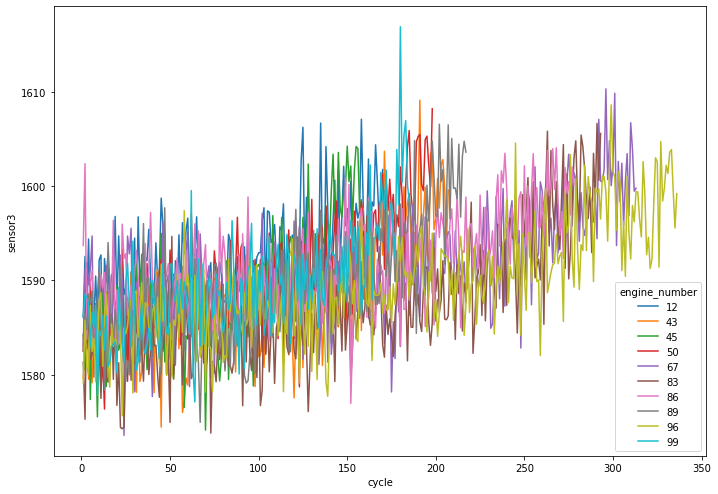

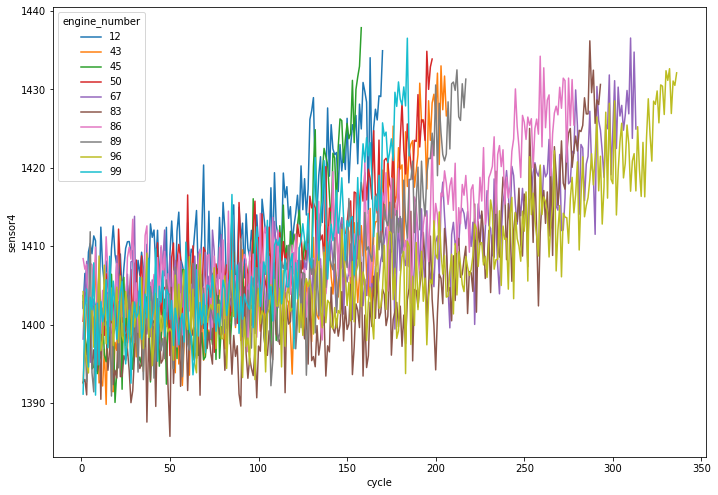

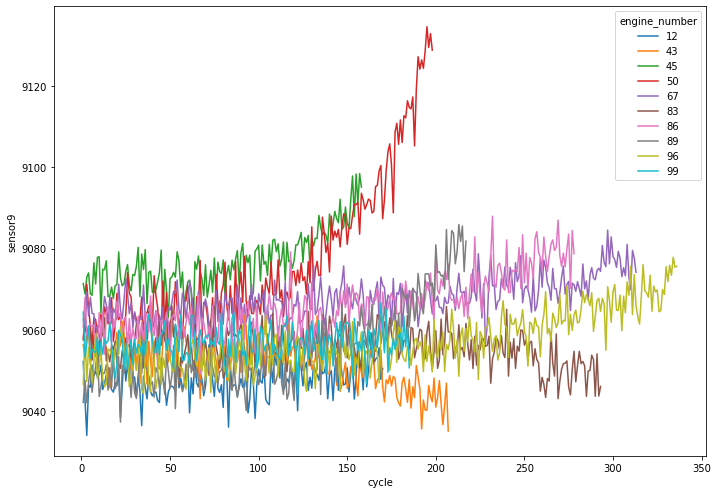

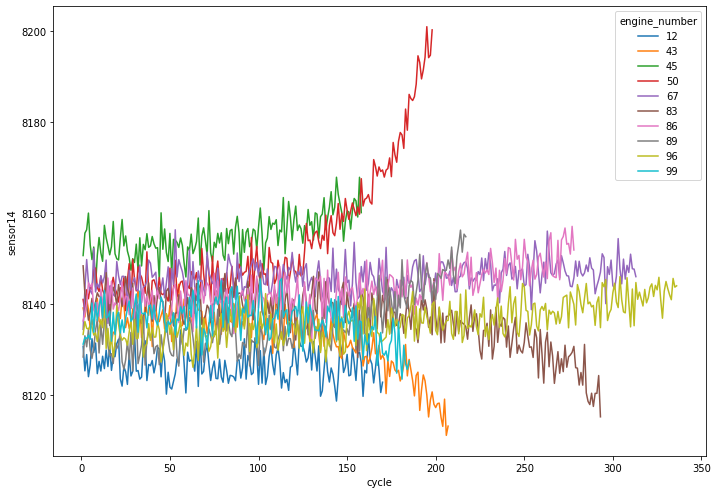

In [ ]:

for j in sensors_plot:
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    dataframe = df[df['engine_number'].isin(engine_plot)]
    sns.lineplot(ax=ax,data=dataframe, x=dataframe['cycle'],y=dataframe[j],hue=dataframe['engine_number'],palette=sns.color_palette("tab10"))
    #plt.title('Engine number '+str(i))
    plt.show()

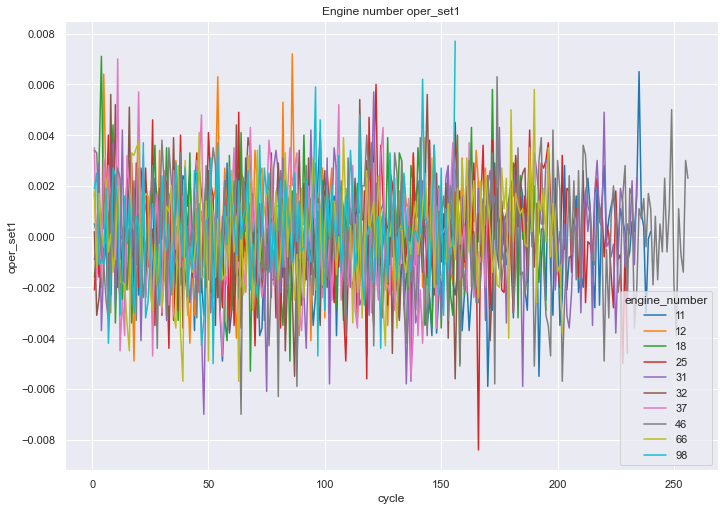

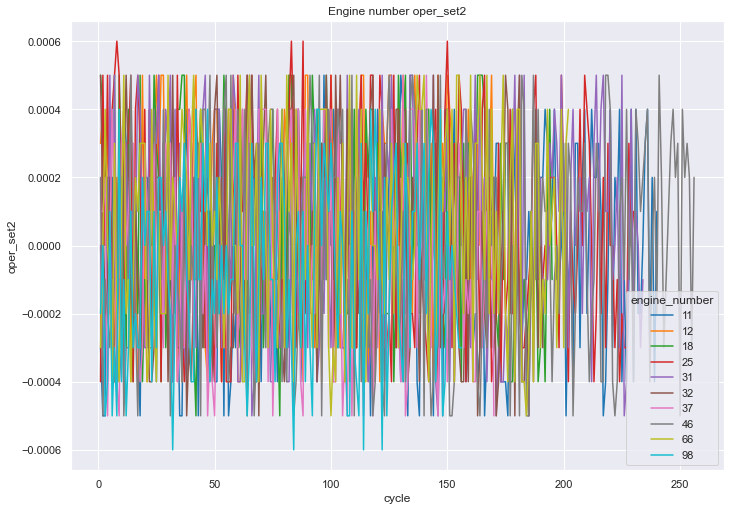

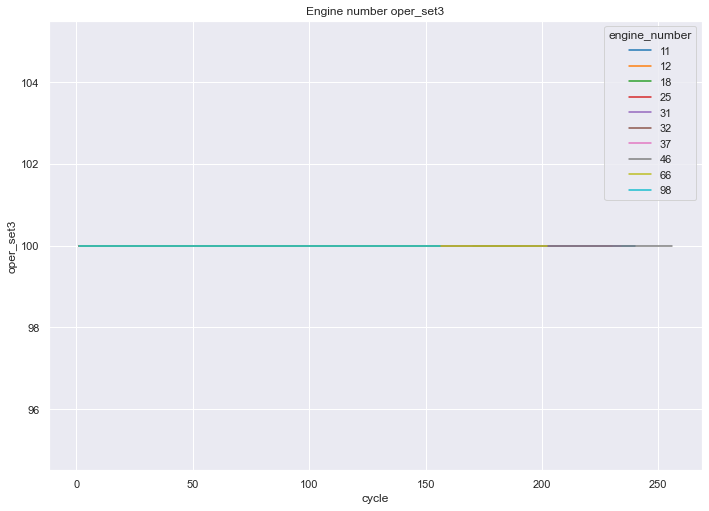

In [26]:
for i in ['oper_set1','oper_set2','oper_set3']:
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    dataframe = df[df['engine_number'].isin(engine_plot)]
    sns.lineplot(ax=ax,data=dataframe, x=dataframe['cycle'],y=dataframe[i],hue=dataframe['engine_number'],palette=sns.color_palette("tab10"))
    plt.title('Engine number '+str(i))
    plt.show()

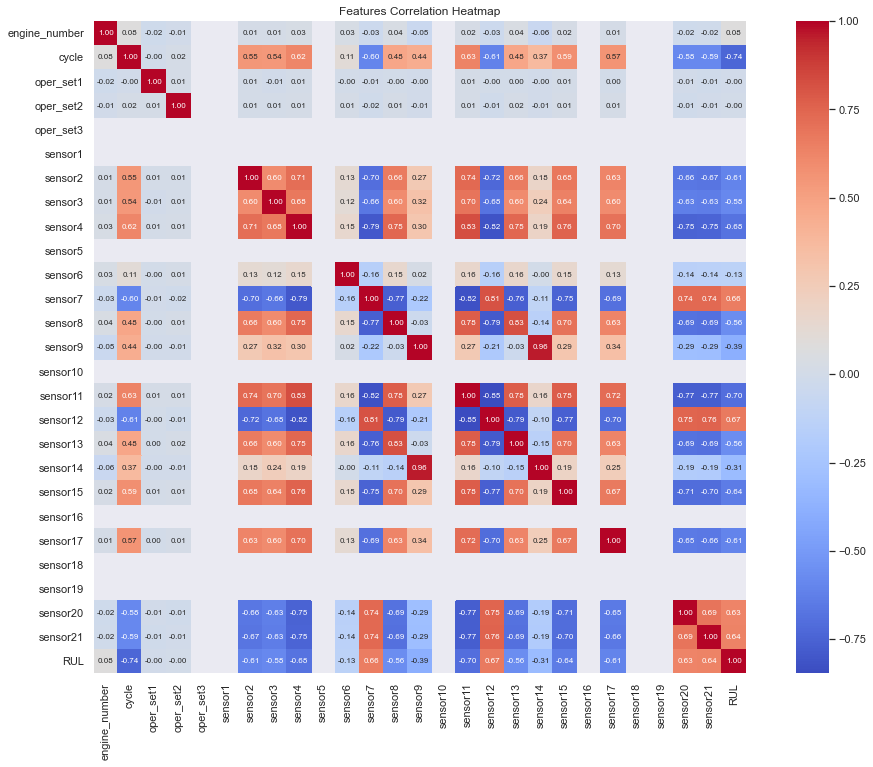

In [40]:
corr = df.corr()
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(18, 12))
cmap=sns.color_palette("coolwarm", as_cmap=True)
hm = sns.heatmap(corr, cbar=True, cmap=cmap,annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=df.columns, xticklabels=df.columns)
plt.title('Features Correlation Heatmap')

plt.show()

In [28]:
corr['RUL']

engine_number    0.078753
cycle           -0.736241
oper_set1       -0.003198
oper_set2       -0.001948
oper_set3             NaN
sensor1               NaN
sensor2         -0.606484
sensor3         -0.584520
sensor4         -0.678948
sensor5               NaN
sensor6         -0.128348
sensor7          0.657223
sensor8         -0.563968
sensor9         -0.390102
sensor10              NaN
sensor11        -0.696228
sensor12         0.671983
sensor13        -0.562569
sensor14        -0.306769
sensor15        -0.642667
sensor16              NaN
sensor17        -0.606154
sensor18              NaN
sensor19              NaN
sensor20         0.629428
sensor21         0.635662
RUL              1.000000
Name: RUL, dtype: float64

### Observation:

1) From the plot we can observe that the operation settings 1 and 2 are varying but it is giving no information to the time of failure and operating 3 is constant throughout the lifecyce of the component. <br>
2) The heatmap showing the correlation matrix also depict the same i.e. the correlation value of the operating setting 1 and 2 is very less with RUL. <br>
3) From the heatmap, it shows that sensor12 and sensor 7 are correlated with sensor3, sensor4, sensor8, sensor13, sensor15, sensor18 and RUL. <br>
4) sensor2, sensor3, sensor4, sensor8, sensor13, sensor15, sensor17, sensor20, RUL and sensor21 are highly correlated with sensor7. <br>
5) Sensor 1 & 7 , sensor 12 and 4, sensor 12 and 11, sensor 11 and 4, sensor8 and 13 and sensor 7 and 12 are highly correlated with correlation value greater than and equal to 0.80.<br>
6) Sensors 1, 5, 10, 16 are perfectly correlated, we can use any one of the sensor value and drop the rest 3. We will drop columns of sensor 1,5 and 10.




In [33]:
## The engine with shortest and longest RUL

cycle_length=df.groupby('engine_number')['cycle'].max().sort_values()
print('The engine number ' + str(cycle_length.index[0])+ ' has the shortest life cycle of '+str(cycle_length.iloc[0]))
print('The engine number ' + str(cycle_length.index[-1])+ ' has the longest life cycle of '+str(cycle_length.iloc[-1]))

The engine number 39 has the shortest life cycle of 128
The engine number 69 has the longest life cycle of 362


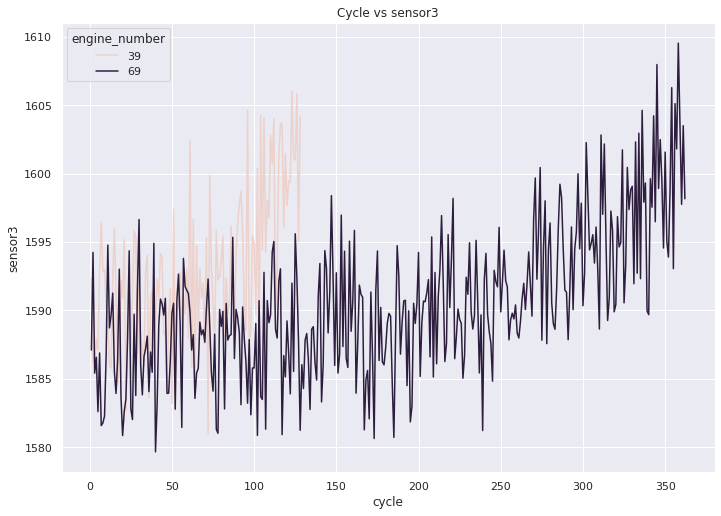

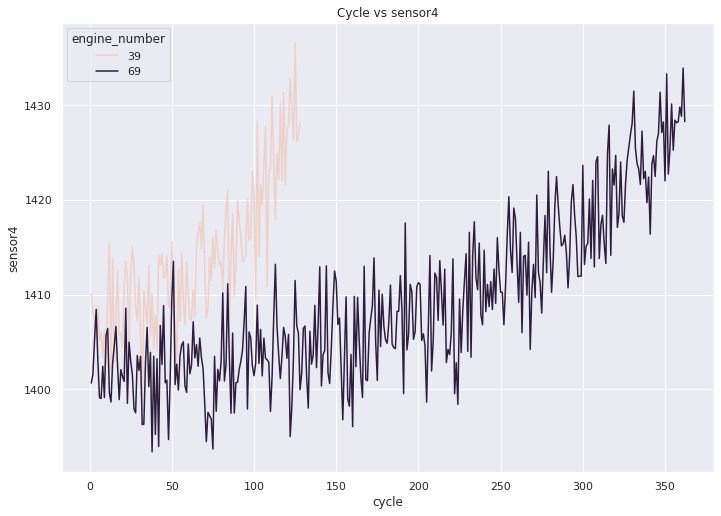

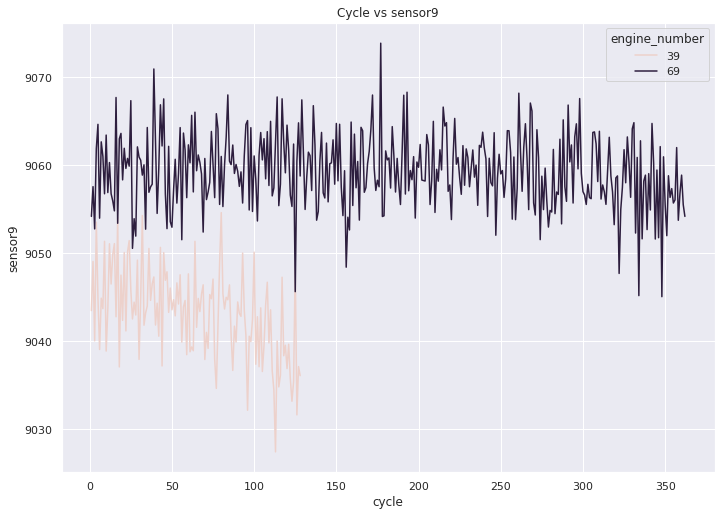

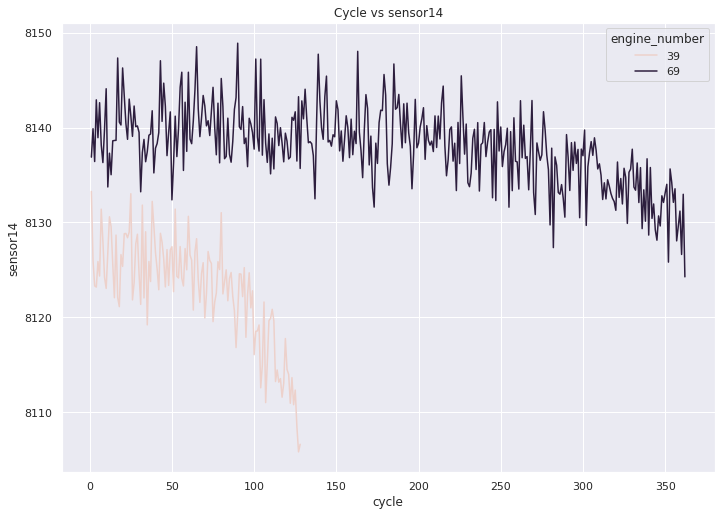

In [ ]:
## Plotting the sensor value for the two engines with the shortest and longest life cycle
eng_lst= [39,69]  ## list containing the engine number with the highest and lowest life cycle
for j in sensors_plot:
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    dataframe = df[df['engine_number'].isin(eng_lst)]
    sns.lineplot(ax=ax,data=dataframe, x=dataframe['cycle'],y=dataframe[j],hue=dataframe['engine_number'])
    plt.title("Cycle vs "+str(j))
    plt.show()

In [25]:
### fucntion for calculating rmse and r2

def performance(y_true,y_pred, tag='test'):
    mse=mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse=np.sqrt(mse)
    print('{} set RMSE:{}, R2:{}'.format(tag,rmse,r2))
    

In [26]:
## we are dropping engine_number,cycle,sensor18,sensor19 and oper_set3 as these carry non-trivial wrt RUL.
data= df.drop(columns=['cycle','oper_set3','engine_number','sensor18','sensor19','sensor1','sensor5','sensor10'])

In [27]:
data.head()

,oper_set1,oper_set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21,RUL
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,39.06,23.4190,191.0
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,39.00,23.4236,190.0
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,38.95,23.3442,189.0
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,38.88,23.3739,188.0
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,38.90,23.4044,187.0


In [28]:
x_train = data.drop(columns=['RUL'])
y_train=data['RUL']

In [29]:
scaler = StandardScaler()
x_train_sc=scaler.fit_transform(x_train)

In [30]:
x_train_sc

array([[-0.31597968, -1.3729532 , -1.72172539, ..., -0.78170979,
         1.34849274,  1.19442705],
       [ 0.87272193, -1.03172035, -1.06177971, ..., -0.78170979,
         1.01652793,  1.23692196],
       [-1.96187421,  1.01567674, -0.66181262, ..., -2.07309423,
         0.73989059,  0.50342281],
       ...,
       [ 0.18693254, -0.00802181,  1.47801126, ...,  3.09244354,
        -2.08181033, -3.29248147],
       [-0.49885685,  1.01567674,  1.09804254, ...,  1.15536688,
        -2.91172236, -2.08507166],
       [-1.458962  , -1.71418605,  2.33794049, ...,  1.8010591 ,
        -2.46910261, -2.19408035]])

In [31]:
x_test=df_test.copy()
#x_test=df_test.drop(columns=['cycle','oper_set3','engine_number','sensor18','sensor19'])
x_test = x_test.groupby('engine_number').last().reset_index().drop(columns=['cycle','oper_set3','engine_number','sensor18','sensor19','sensor1','sensor5','sensor10'])
x_test.head()



,oper_set1,oper_set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21
0,-0.0006,0.0004,642.58,1581.22,1398.91,21.61,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,0.03,393,38.81,23.3552
1,0.0018,-0.0001,642.55,1586.59,1410.83,21.61,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,0.03,391,38.81,23.2618
2,-0.0016,0.0004,642.88,1589.75,1418.89,21.61,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,0.03,395,38.93,23.2740
3,0.0012,0.0004,642.78,1594.53,1406.88,21.61,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,0.03,395,38.58,23.2581
4,-0.0013,-0.0004,642.27,1589.94,1419.36,21.61,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,0.03,394,38.75,23.4117


In [32]:
x_test_sc = scaler.transform(x_test)
y_test = pd.read_csv('RUL_FD001.txt',names=['RUL'])



In [38]:
LR=LinearRegression()
LR.fit(x_train_sc,y_train)
y_pred=LR.predict(x_test)
y_pred_train=LR.predict(x_train)

In [39]:
performance(y_train,y_pred_train, tag='train')
performance(y_test,y_pred, tag='test')

train set RMSE:126930.4665607899, R2:-3395892.336383748
test set RMSE:126897.87811672007, R2:-9325006.209881943


Text(0, 0.5, 'cumulative explained variance')

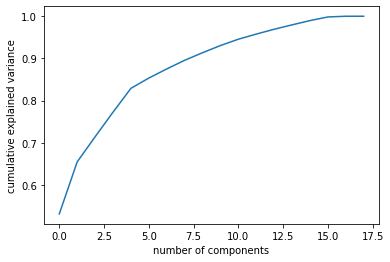

In [29]:
pca = PCA().fit(x_train_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca.explained_variance_ratio_

array([5.30980118e-01, 1.23458027e-01, 5.95486095e-02, 5.83626502e-02,
       5.65927553e-02, 2.43380037e-02, 2.16593128e-02, 2.04885375e-02,
       1.80019096e-02, 1.70451126e-02, 1.50219453e-02, 1.21262984e-02,
       1.15254140e-02, 1.03868075e-02, 1.01471885e-02, 8.59537077e-03,
       1.72193938e-03, 5.12435940e-35])

In [ ]:
pca= PCA(n_components = 6)
x_train_nw=pca.fit_transform(x_train_sc)

In [ ]:
x_train_nw

array([[-2.95277923, -0.43215565, -1.17284301,  0.47817117, -0.66879654,
         0.81722504],
       [-2.36366944, -0.78687203, -0.13234921,  1.15384977, -0.70239878,
         0.97645517],
       [-2.97866502, -0.55246559, -0.53040805, -2.12441843,  0.3760824 ,
         0.57200496],
       ...,
       [ 8.00015654, -0.72525314,  0.03157507,  0.29248613,  0.31358279,
        -0.25098653],
       [ 7.74525381, -0.78212166,  0.30372914, -0.83475811,  0.74522922,
         0.70815174],
       [ 7.84481455, -1.32230066, -2.34007959,  0.14370905,  0.04481736,
        -0.32852191]])

In [35]:
x_test_new=pca.transform(x_test_sc)

In [ ]:
LR=LinearRegression()
LR.fit(x_train_nw,y_train)
y_pred=LR.predict(x_test_new)
y_pred_train=LR.predict(x_train_nw)

In [ ]:
performance(y_train,y_pred_train, tag='train')
performance(y_test,y_pred, tag='test')

train set RMSE:44.803228038205, R2:0.5769020711308306
test set RMSE:31.113328681752222, R2:0.4394254078832903


In [32]:
reducer=umap.UMAP(n_neighbors=9,n_components=6)

In [31]:
reducer=umap.UMAP(n_neighbors=9,n_components=6)

In [ ]:
embedding = reducer.fit_transform(x_train_sc)
embedding.shape

(20631, 6)

In [33]:
embedding_test = reducer.transform(x_test_sc)

In [34]:
embedding_test.shape

(100, 6)

In [ ]:
LR=LinearRegression()
LR.fit(embedding,y_train)
y_pred=LR.predict(embedding_test)
y_pred_train=LR.predict(embedding)
performance(y_train,y_pred_train, tag='train')
performance(y_test,y_pred, tag='test')

train set RMSE:44.631203603636365, R2:0.5801448488352856
test set RMSE:30.422535520616254, R2:0.4640413685531566


In [ ]:
## Parameter tuning for PCA using Linear Regression 

n_comp = [4,5,6,7,8,10,11]
n_neighbors = [3,5,7,9,11,13]

parameter={}

for i in (n_comp):
  print("n_component :"+ str(i))
  pca = PCA(n_components=i)
  x_train_trans = pca.fit_transform(x_train_sc)
  x_test_trans = pca.transform(x_test_sc)
  LR=LinearRegression()
  LR.fit(x_train_trans,y_train)
  y_pred_train = LR.predict(x_train_trans)
  y_pred = LR.predict(x_test_trans)
  performance(y_train,y_pred_train, tag='train')
  performance(y_test,y_pred, tag='test')


n_component :4
train set RMSE:44.81214151937888, R2:0.5767337060048625
test set RMSE:31.154727718040085, R2:0.437932627231833
n_component :5
train set RMSE:44.81155812597651, R2:0.5767447266411294
test set RMSE:31.168395367317782, R2:0.4374393586096851
n_component :6
train set RMSE:44.80322812619157, R2:0.5769020694690337
test set RMSE:31.113328703262635, R2:0.4394254071081761
n_component :7
train set RMSE:44.79525092704095, R2:0.5770527209342192
test set RMSE:31.08301823230766, R2:0.4405170938037414
n_component :8
train set RMSE:44.776820320341905, R2:0.577400685111938
test set RMSE:31.06638272016433, R2:0.44111579975944615
n_component :10
train set RMSE:44.76912046653386, R2:0.5775460135718291
test set RMSE:31.075516590019785, R2:0.4407871148252335
n_component :11
train set RMSE:44.73815478786608, R2:0.5781302131344203
test set RMSE:31.28129275365751, R2:0.43335659140677085


In [ ]:
## UMAP parameter tuning for Linear Regression

n_comp = [4,5,6,7,8,10,11,13,15]
n_neighbors = [3,5,7,9,11]

parameter={}

for i in product(n_comp,n_neighbors):
  print('n_component :{} and n_neighbor : {}'.format(i[0],i[1]))
  reducer = umap.UMAP(n_components=i[0],n_neighbors=i[1])
  x_train_trans = reducer.fit_transform(x_train_sc)
  x_test_trans = reducer.transform(x_test_sc)
  LR=LinearRegression()
  LR.fit(x_train_trans,y_train)
  y_pred_train = LR.predict(x_train_trans)
  y_pred = LR.predict(x_test_trans)
  performance(y_train,y_pred_train, tag='train')
  performance(y_test,y_pred, tag='test')

n_component :4 and n_neighbor : 3
train set RMSE:52.27457855333814, R2:0.4240253516581559
test set RMSE:31.72082170898013, R2:0.4173210705122695
n_component :4 and n_neighbor : 5
train set RMSE:45.76007530198511, R2:0.5586371768630425
test set RMSE:31.913911843532247, R2:0.41020574503323926
n_component :4 and n_neighbor : 7
train set RMSE:45.243275097942366, R2:0.5685501138637274
test set RMSE:30.877059524939945, R2:0.4479068918077631
n_component :4 and n_neighbor : 9
train set RMSE:45.02566197424628, R2:0.572690546275302
test set RMSE:29.172089980458153, R2:0.5071945016416137
n_component :4 and n_neighbor : 11
train set RMSE:45.014633229568695, R2:0.5728998540116351
test set RMSE:29.953499515195247, R2:0.48044013676145425
n_component :4 and n_neighbor : 13
train set RMSE:45.42529733358252, R2:0.5650715217342541
test set RMSE:32.464386820116445, R2:0.3896838466516809
n_component :5 and n_neighbor : 3
train set RMSE:49.625741936561646, R2:0.4809175884890068
test set RMSE:34.359849601541

In [36]:
## Plot between predicted RUL and Actual RUL with PCA

## Best Result at n_component = 10
pca = PCA(n_components=8)
x_train_trans = pca.fit_transform(x_train_sc)
x_test_trans = pca.transform(x_test_sc)
LR=LinearRegression()
LR.fit(x_train_trans,y_train)
y_pred_train = LR.predict(x_train_trans)
y_pred_pca = LR.predict(x_test_trans)


In [ ]:
## Best result at n_component = 4 and n_neighbor = 9

reducer = umap.UMAP(n_components=4,n_neighbors=9)
x_train_trans = reducer.fit_transform(x_train_sc)
x_test_trans = reducer.transform(x_test_sc)
LR=LinearRegression()
LR.fit(x_train_trans,y_train)
y_pred_train = LR.predict(x_train_trans)
y_pred_umap = LR.predict(x_test_trans)


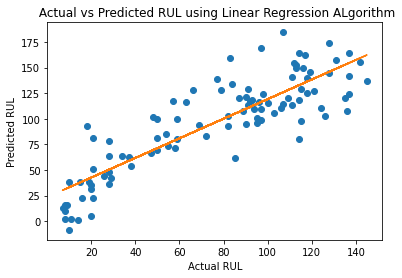

Text(0.5, 1.0, ' Actual vs Predicted RUL using Linear Regression ALgorithm')

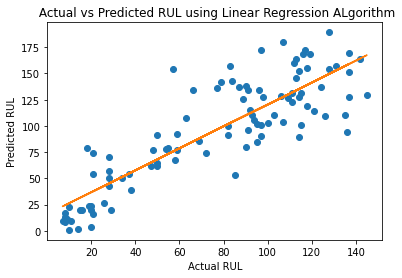

In [ ]:
x = np.array([y_test]).flatten()
y = np.array(y_pred_pca).flatten()

m, b = np.polyfit(x, y, 1)
#m = slope, b = intercept
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using Linear Regression ALgorithm")
plt.show()

x1 = np.array([y_test]).flatten()
y1 = np.array(y_pred_umap).flatten()

m1, b1 = np.polyfit(x1, y1, 1)
#m = slope, b = intercept
plt.plot(x1, y1, 'o')
plt.plot(x1, m1*x1 + b1)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using Linear Regression ALgorithm")

PCA result: <br>
n_component :8 <br>
train set RMSE:44.776820320341905, R2:0.577400685111938 <br>
test set RMSE:31.066382720164334, R2:0.44111579975944604

UMAP result :

n_component :4 and n_neighbor : 9 <br>
train set RMSE:45.02566197424628, R2:0.572690546275302 <br>
test set RMSE:29.172089980458153, R2:0.5071945016416137



In [ ]:
## Using KNearestNeighbors (PCA parameter tuning)

n_comp = [4,5,6,7,8,10,11,13,14]
n_neighbors = [3,5,7,9,11,13]

parameter={}

for i in (n_comp):
  print("n_component :"+ str(i))
  pca = PCA(n_components=i)
  x_train_trans = pca.fit_transform(x_train_sc)
  x_test_trans = pca.transform(x_test_sc)
  knn=KNeighborsRegressor(n_neighbors=20)
  knn.fit(x_train_trans,y_train)
  y_pred_train = knn.predict(x_train_trans)
  y_pred = knn.predict(x_test_trans)
  performance(y_train,y_pred_train, tag='train')
  performance(y_test,y_pred, tag='test')

n_component :4
train set RMSE:39.98782793237538, R2:0.6629627385602932
test set RMSE:31.5710690347983, R2:0.42280968985730005
n_component :5
train set RMSE:40.02713355256991, R2:0.6622998383728717
test set RMSE:31.518381144976335, R2:0.42473458910852335
n_component :6
train set RMSE:40.21670693322317, R2:0.6590934852623105
test set RMSE:32.171163329913945, R2:0.4006590016987964
n_component :7
train set RMSE:40.133812865788606, R2:0.660497379620216
test set RMSE:32.892077313541634, R2:0.373497136089488
n_component :8
train set RMSE:40.22987300812684, R2:0.6588702379726699
test set RMSE:32.958193973578105, R2:0.37097592661310363
n_component :10
train set RMSE:40.40800556356534, R2:0.6558425948658493
test set RMSE:30.94677204491609, R2:0.4454111068953902
n_component :11
train set RMSE:40.51177518842699, R2:0.6540727009672929
test set RMSE:32.035809260888044, R2:0.40569161967991074
n_component :13
train set RMSE:40.53139225413139, R2:0.6537376022688035
test set RMSE:30.485819244363434, R2:

Using PCA <br>

Best Parameter obtained at : n_component :13 <br>
train set RMSE:40.53139225413139, R2:0.6537376022688035 <br>
test set RMSE:30.485819244363434, R2:0.46180929063781073

In [ ]:
## Using KNearestNeighbors (UMAP parameter tuning)

n_comp = [4,5,6,7,8,10,11,13,15]
n_neighbors = [3,5,7,9,11]

parameter={}

for i in product(n_comp,n_neighbors):
  print('n_component :{} and n_neighbor : {}'.format(i[0],i[1]))
  reducer = umap.UMAP(n_components=i[0],n_neighbors=i[1])
  x_train_trans = reducer.fit_transform(x_train_sc)
  x_test_trans = reducer.transform(x_test_sc)
  knn=KNeighborsRegressor(n_neighbors=20)
  knn.fit(x_train_trans,y_train)
  y_pred_train = knn.predict(x_train_trans)
  y_pred = knn.predict(x_test_trans)
  performance(y_train,y_pred_train, tag='train')
  performance(y_test,y_pred, tag='test')

n_component :4 and n_neighbor : 3
train set RMSE:42.68541894970383, R2:0.6159556461470082
test set RMSE:33.27543726234113, R2:0.3588081433595215
n_component :4 and n_neighbor : 5
train set RMSE:41.67232630361591, R2:0.6339690760584763
test set RMSE:32.412736694083705, R2:0.39162430098948975
n_component :4 and n_neighbor : 7
train set RMSE:41.43011139195833, R2:0.6382117233421767
test set RMSE:31.204182411978046, R2:0.43614677101270405
n_component :4 and n_neighbor : 9
train set RMSE:41.604995267519435, R2:0.6351509314318334
test set RMSE:31.542655642795836, R2:0.423848144063686
n_component :4 and n_neighbor : 11
train set RMSE:41.60150435305209, R2:0.6352121550156775
test set RMSE:31.090453116672325, R2:0.4402494114205264
n_component :5 and n_neighbor : 3
train set RMSE:42.327299525591926, R2:0.6223726761428795
test set RMSE:34.897344813036995, R2:0.29477901805671947
n_component :5 and n_neighbor : 5
train set RMSE:41.8136083607037, R2:0.6314829530589523
test set RMSE:31.99310003735180

Using UMAP:<br>
n_component :10 and n_neighbor : 7 <br>
train set RMSE:41.4673182867546, R2:0.6375616134426767 <br>
test set RMSE:29.919960728583852, R2:0.48160298264559165 <br>

In [ ]:
## Plot between predicted RUL and Actual RUL with UMAP 

## Best Result at n_component = 10
pca = PCA(n_components=13)
x_train_trans = pca.fit_transform(x_train_sc)
x_test_trans = pca.transform(x_test_sc)
knn=KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train_trans,y_train)
y_pred_train = knn.predict(x_train_trans)
y_pred_pca_knn = knn.predict(x_test_trans)


In [ ]:
## Best result at n_component = 10 and n_neighbor = 7

reducer = umap.UMAP(n_components=10,n_neighbors=7)
x_train_trans = reducer.fit_transform(x_train_sc)
x_test_trans = reducer.transform(x_test_sc)
knn=KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train_trans,y_train)
y_pred_train = knn.predict(x_train_trans)
y_pred_umap_knn = knn.predict(x_test_trans)


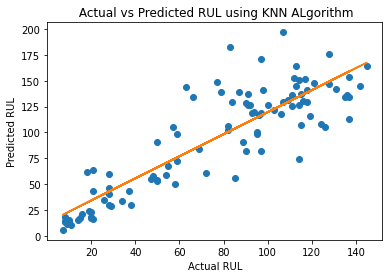

Text(0.5, 1.0, ' Actual vs Predicted RUL using KNN ALgorithm')

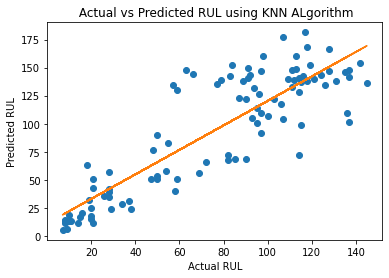

In [ ]:
x = np.array([y_test]).flatten()
y = np.array(y_pred_pca_knn).flatten()

m, b = np.polyfit(x, y, 1)
#m = slope, b = intercept
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using KNN ALgorithm")
plt.show()

x1 = np.array([y_test]).flatten()
y1 = np.array(y_pred_umap_knn).flatten()

m1, b1 = np.polyfit(x1, y1, 1)
#m = slope, b = intercept
plt.plot(x1, y1, 'o')
plt.plot(x1, m1*x1 + b1)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using KNN ALgorithm")

# LSTM Implementation - sliding window

In [33]:
## columns with zero standard deviation and highly correlated with other sensors
drop_columns =['oper_set3','sensor18','sensor19','sensor1','sensor5','sensor10','RUL','engine_number']

data_train = df.copy()

## training data (piece-wise linear function)
data_train.loc[data_train['RUL'] >= 125, "RUL"] = 125 ## "It should be noted that in cases where knowledge of a suitable degradation model is unavailable, the linear model is the most natural choice to use." (Sateesh Babu et al)

In [34]:
## function for returning scaled dataframe for training

from sklearn.preprocessing import MinMaxScaler
def scale_fun (data,drop_col):
    x_train = data.drop(columns=drop_col)
    scaler = MinMaxScaler()
    x_train_sc = scaler.fit_transform(x_train)
    x_train_sc = np.append(np.array(data['engine_number']).reshape(x_train.shape[0],1),x_train_sc,axis=1)

    c = list(x_train.columns)
    c.insert(0,'engine_number')
    x_train_df = pd.DataFrame(x_train_sc, columns = c)

    return x_train_df,scaler


In [35]:
## scaled dataframe for training
x_train_df_sc,scaler = scale_fun(data_train,drop_columns)
x_train_df_sc.head()


,engine_number,cycle,oper_set1,oper_set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21
0,1.0,0.00000,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.713178,0.724662
1,1.0,0.00277,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.666667,0.731014
2,1.0,0.00554,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.627907,0.621375
3,1.0,0.00831,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.573643,0.662386
4,1.0,0.01108,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.589147,0.704502


In [36]:
x_test=df_test.copy()
#x_test=df_test.drop(columns=['cycle','oper_set3','engine_number','sensor18','sensor19'])
x_test = x_test.groupby('engine_number').last().reset_index().drop(columns=['oper_set3','sensor18','sensor19','sensor1','sensor5','sensor10'])
#x_test.head()

In [37]:
## Train scaled dataframe (combining predictor and response variable)

data_train_nw = x_train_df_sc.copy()
data_train_nw['RUL'] = data_train['RUL'].reset_index(drop=True)  ## dataset to be used for creating training data


In [38]:
## features to be considered for training the model
seq_cols = list(x_train_df_sc.drop(columns=['engine_number']).columns)  
seq_cols

['cycle',
 'oper_set1',
 'oper_set2',
 'sensor2',
 'sensor3',
 'sensor4',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9',
 'sensor11',
 'sensor12',
 'sensor13',
 'sensor14',
 'sensor15',
 'sensor16',
 'sensor17',
 'sensor20',
 'sensor21']

In [39]:
"""function for predictor variable"""

def seq_generator(df, sequence_length, columns):
    data = df[columns].values
    num_elements = data.shape[0]

    seq_gen = []
    for start, stop in zip(range(0, num_elements-(sequence_length-1)), range(sequence_length, num_elements+1)):
        seq_gen.append(data[start:stop, :])

    return seq_gen


""" function for returning train and validation set"""

def data_train_val_lstm(df, validation_size, sequence_length, columns):
    engine_num = df['engine_number'].unique()    
    val_size = validation_size
    len_unit = len(engine_num) ## total number of engine in the dataset
    num_eng_val = val_size*len_unit ## Number of engines in the validation set
    unit_num = list(df['engine_number'].unique())  ## number of engine present in the dataset
    val_num = random.sample(unit_num, int(num_eng_val))  ## engine units in validation set
    train_num = [i for i in unit_num if i not in val_num]  ## engine units in training set 
    

    data_train_gen = [list(seq_generator(df[df['engine_number']==i], sequence_length, columns))
            for i in train_num]
    data_val_gen = [list(seq_generator(df[df['engine_number']==i], sequence_length, columns))
            for i in val_num]
    data_array_train = np.concatenate(list(data_train_gen))
    data_array_val = np.concatenate(list(data_val_gen))
    
    return data_array_train,data_array_val,train_num,val_num

def label_train_val_lstm(df,sequence_length,train_num,val_num):

    unit_num = df['engine_number'].unique()  ## number of engine present in the dataset
    label_arr_train =[]
    label_arr_val =[]
    for i in train_num:
        data_engine = df[df['engine_number']==i]['RUL'].values ## data wrt to each engine
        num_elem = data_engine.shape[0]  ## number of rows
        label_data_train = []
        for start,stop in zip(range(0,num_elem-sequence_length+1),range(sequence_length,num_elem+1)):
            label_data_train.append([data_engine[start:stop][-1]])
        label_arr_train.append(label_data_train)  

    array_train = np.concatenate(label_arr_train)
    
    for i in val_num:
        data_engine = df[df['engine_number']==i]['RUL'].values ## data wrt to each engine
        num_elem = data_engine.shape[0]  ## number of rows
        label_data_val = []
        for start,stop in zip(range(0,num_elem-sequence_length+1),range(sequence_length,num_elem+1)):
            label_data_val.append([data_engine[start:stop][-1]])
        label_arr_val.append(label_data_val)  

    array_val = np.concatenate(label_arr_val)
    return array_train,array_val



def data_test_lstm(data_scaled_test,seq_length):
    test_unit = data_scaled_test['engine_number'].unique()
    data_arr_test = []
    for i in test_unit:  
        data_eng = data_scaled_test[data_scaled_test['engine_number']==i]
        data_eng = data_eng.drop(columns='engine_number').values
        num_elem = data_eng.shape[0]
        seq_arr_test = []
        if num_elem < seq_length:
            data_n = np.full((seq_length-num_elem,data_eng.shape[1]),fill_value=-100)
            data_eng = np.concatenate((data_n,data_eng),axis=0)
            data_arr_test.append(data_eng)
        else:
            data_n = data_eng[num_elem-seq_length:num_elem]
            data_arr_test.append(data_n)
    return np.array(data_arr_test)


In [40]:
seq_length = 50
feature_train, feature_validation, train_num,val_num = data_train_val_lstm(data_train_nw,0.10,seq_length,seq_cols)
label_train,label_val = label_train_val_lstm(data_train_nw,seq_length,train_num,val_num)
print("shape of x_train is {} and x_validation is {}".format(feature_train.shape,feature_validation.shape))
print("shape of y_train is {} and y_validation is {}".format(label_train.shape,label_val.shape))


shape of x_train is (14298, 50, 19) and x_validation is (1433, 50, 19)
shape of y_train is (14298, 1) and y_validation is (1433, 1)


### Test Data Preparation

In [41]:
drop_nw = drop_columns.copy()
drop_nw.remove('RUL')
drop_nw.remove('engine_number')
drop_nw ## list columns to be dropped from test dataset

['oper_set3', 'sensor18', 'sensor19', 'sensor1', 'sensor5', 'sensor10']

In [42]:
df_test[df_test['engine_number']==1]

,engine_number,cycle,oper_set1,oper_set2,oper_set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
5,1,6,0.0012,0.0003,100.0,518.67,642.11,1579.12,1395.13,14.62,...,521.92,2388.08,8127.46,8.4238,0.03,392,2388,100.0,38.91,23.3467
6,1,7,-0.0000,0.0002,100.0,518.67,642.11,1583.34,1404.84,14.62,...,522.01,2388.06,8134.97,8.3914,0.03,391,2388,100.0,38.85,23.3952
7,1,8,0.0006,-0.0000,100.0,518.67,642.54,1580.89,1400.89,14.62,...,522.09,2388.06,8125.93,8.4213,0.03,393,2388,100.0,39.05,23.3224
8,1,9,-0.0036,0.0000,100.0,518.67,641.88,1593.29,1412.28,14.62,...,522.03,2388.05,8134.15,8.4353,0.03,391,2388,100.0,39.10,23.4521
9,1,10,-0.0025,-0.0001,100.0,518.67,642.07,1585.25,1398.64,14.62,...,522.00,2388.06,8134.08,8.4093,0.03,391,2388,100.0,38.87,23.3820


In [43]:
x_test_nw = df_test.drop(columns=drop_nw)
x_test_nw.columns

Index(['engine_number', 'cycle', 'oper_set1', 'oper_set2', 'sensor2',
       'sensor3', 'sensor4', 'sensor6', 'sensor7', 'sensor8', 'sensor9',
       'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16',
       'sensor17', 'sensor20', 'sensor21'],
      dtype='object')

In [44]:
x_test_sc = scaler.transform(df_test.drop(columns=['engine_number']+drop_nw))
x_test_sc = np.append(np.array(df_test['engine_number']).reshape(df_test.shape[0],1),x_test_sc,axis=1)
c = list(x_test_nw.columns)
x_test_df_sc = pd.DataFrame(x_test_sc, columns = c)

In [45]:
test_array = data_test_lstm(x_test_df_sc,seq_length)
test_array.shape

(100, 50, 19)

In [46]:
test_array[0]


array([[-1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02],
       [-1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02],
       [-1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
    

In [47]:
y_test = pd.read_csv('RUL_FD001.txt',names=['RUL'])


In [48]:
filepath1="saved_model_1/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath2="saved_model_nn/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
filepath3="saved_model_128/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 3,verbose=1)
callbacks_list = [checkpoint,early_stop]

## Single layer of LSTM 

In [290]:
node = [32,64]
batch_size = [32,64,128]
RMSE = []
row = []
column = ["node","batch"]
for i in product(node,batch_size):
    node_x,batch_size_x=i
    row.append(list(i))
    print("node is {} and batch is {}".format(node_x,batch_size_x))
    # define model
    model = Sequential()
    model.add(LSTM(node_x, activation='tanh', input_shape=(None, 19),return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(
        feature_train,label_train,
        epochs=15,batch_size=batch_size_x,
        validation_data = (feature_validation,label_val),
        callbacks = callbacks_list)
   
    testPredict = model.predict(test_array)
    mse=mean_squared_error(y_test,testPredict)
    rmse=np.sqrt(mse)
    RMSE.append(rmse)

parameter_df_layer = pd.DataFrame(row,columns = column)
parameter_df_layer['RMSE']=RMSE

node is 32 and batch is 32
Epoch 1/15
445/445 [==============================] - 11s 21ms/step - loss: 5533.3716 - val_loss: 4443.5176

Epoch 00001: val_loss improved from inf to 4443.51758, saving model to saved_model_1\weights-improvement-01-4443.52.hdf5
Epoch 2/15
445/445 [==============================] - 10s 21ms/step - loss: 3916.9797 - val_loss: 3280.1680

Epoch 00002: val_loss improved from 4443.51758 to 3280.16797, saving model to saved_model_1\weights-improvement-02-3280.17.hdf5
Epoch 3/15
445/445 [==============================] - 9s 21ms/step - loss: 2950.9609 - val_loss: 2546.0540

Epoch 00003: val_loss improved from 3280.16797 to 2546.05396, saving model to saved_model_1\weights-improvement-03-2546.05.hdf5
Epoch 4/15
445/445 [==============================] - 10s 22ms/step - loss: 2349.0063 - val_loss: 2109.2092

Epoch 00004: val_loss improved from 2546.05396 to 2109.20923, saving model to saved_model_1\weights-improvement-04-2109.21.hdf5
Epoch 5/15
445/445 [=============

In [292]:
parameter_df_layer = pd.DataFrame(row,columns = column)
parameter_df_layer['RMSE']=RMSE

In [359]:
parameter_df_layer

,node,batch,RMSE
0,32,32,14.228093
1,32,64,24.710496
2,32,128,45.068112
3,64,32,14.029133
4,64,64,17.087064
5,64,128,26.942522


Model with 64 nodes with batch_size=32 in the LSTM is finalized for the dataset FD001. <br>
**Note**: We also observe that the increasing the batch size has resulted in increase of the RMSE value. Therefore we will use this architecture to further train this model check if the model can be improved further.

In [373]:
## Loading the model with the lowest validation loss (node =64, batch=32, epoch = 12)
model = load_model("saved_model_1\weights-improvement-12-108.66.hdf5")
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:14.091768080641048, R2:0.8850069932098092


In [375]:
## Further training the model to check any improvement in the loaded model

filepath="saved_model_tune/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 3,verbose=1)
callbacks_list = [checkpoint,early_stop]


history = model.fit(feature_train,label_train,
        epochs=10,batch_size=32,
        validation_data = (feature_validation,label_val),
        callbacks = callbacks_list)

Epoch 1/10
445/445 [==============================] - 10s 20ms/step - loss: 123.6831 - val_loss: 147.1466

Epoch 00001: val_loss improved from inf to 147.14656, saving model to saved_model_tune\weights-improvement-01-147.15.hdf5
Epoch 2/10
445/445 [==============================] - 9s 20ms/step - loss: 124.5907 - val_loss: 142.2184

Epoch 00002: val_loss improved from 147.14656 to 142.21843, saving model to saved_model_tune\weights-improvement-02-142.22.hdf5
Epoch 3/10
445/445 [==============================] - 9s 19ms/step - loss: 119.7947 - val_loss: 114.3859

Epoch 00003: val_loss improved from 142.21843 to 114.38588, saving model to saved_model_tune\weights-improvement-03-114.39.hdf5
Epoch 4/10
445/445 [==============================] - 9s 19ms/step - loss: 115.2935 - val_loss: 111.6259

Epoch 00004: val_loss improved from 114.38588 to 111.62589, saving model to saved_model_tune\weights-improvement-04-111.63.hdf5
Epoch 5/10
445/445 [==============================] - 9s 20ms/step - 

In [377]:
from os import listdir

## list of saved model which resulted in the improved result from training the loaded model(node=64,epoch=12,batch_size=32)
m = [str("saved_model_tune\\")+ str(i) for i in listdir("saved_model_tune")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array)
    print(performance(y_test,testPredict))

saved_model_tune\weights-improvement-01-147.15.hdf5
test set RMSE:15.225373822885317, R2:0.8657617181710758
None
saved_model_tune\weights-improvement-02-142.22.hdf5
test set RMSE:14.776865633620776, R2:0.8735539973869001
None
saved_model_tune\weights-improvement-03-114.39.hdf5
test set RMSE:14.554159601990072, R2:0.8773366780443643
None
saved_model_tune\weights-improvement-04-111.63.hdf5
test set RMSE:13.82872517772782, R2:0.8892599417807092
None
saved_model_tune\weights-improvement-05-99.28.hdf5
test set RMSE:14.575955314975433, R2:0.8769690118210659
None


### Observation 
The model has improved with further training of the model. The RMSE loss reduced from 14.09 to 13.82.

In [379]:
## Best model
model = load_model("saved_model_tune\weights-improvement-04-111.63.hdf5")
testPredict=model.predict(test_array)
(performance(y_test,testPredict))

test set RMSE:13.82872517772782, R2:0.8892599417807092


### Plotting training and validation loss

In [380]:
model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(None, 19),return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history= model.fit(
    feature_train,label_train,
    epochs=15,batch_size=32,
    validation_data = (feature_validation,label_val))



Epoch 1/15
445/445 [==============================] - 10s 19ms/step - loss: 4618.4253 - val_loss: 3205.3135
Epoch 2/15
445/445 [==============================] - 8s 19ms/step - loss: 2618.2158 - val_loss: 2112.4138
Epoch 3/15
445/445 [==============================] - 9s 19ms/step - loss: 1925.8136 - val_loss: 1775.1272
Epoch 4/15
445/445 [==============================] - 9s 20ms/step - loss: 1533.9785 - val_loss: 931.3193
Epoch 5/15
445/445 [==============================] - 8s 19ms/step - loss: 735.5634 - val_loss: 486.2111
Epoch 6/15
445/445 [==============================] - 8s 19ms/step - loss: 384.7808 - val_loss: 294.3907
Epoch 7/15
445/445 [==============================] - 8s 19ms/step - loss: 237.4070 - val_loss: 200.9830
Epoch 8/15
445/445 [==============================] - 8s 19ms/step - loss: 187.5908 - val_loss: 157.4149
Epoch 9/15
445/445 [==============================] - 8s 19ms/step - loss: 155.3392 - val_loss: 167.2921
Epoch 10/15
445/445 [==========================

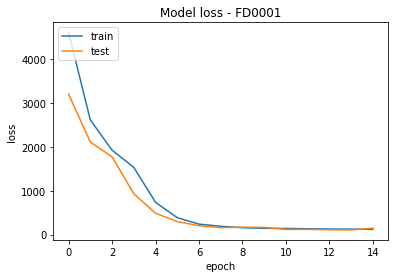

In [382]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss - FD0001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Parameter tuning for two layers of the LSTM

In [70]:
filepath1="2layer_lstm/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)
callbacks_list = [checkpoint,early_stop]


node1=[32,64,128]
node2=[32,64,128]
# dense1=[8,16]
# dense2=[8,16]
RMSE = []
row = []
column = ["node1","node2"]

for i in product(node1,node2):
    node1_v, node2_v = i
    row.append(list(i))

    model = Sequential()
    #model.add(Masking(mask_value=-99., input_shape=(seq_length, train_array.shape[2])))

    model.add(LSTM(node1_v, activation='tanh', input_shape=(seq_length, 19),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(node2_v, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
   
    history = model.fit(
    feature_train,label_train,
    epochs=30,batch_size=32,
    validation_data = (feature_validation,label_val),
    callbacks = callbacks_list)
    
    model.save("2layer_lstm_model/"+str(i)+"2layer_lstm_weight.hdf5")
    
    testPredict = model.predict(test_array)
    mse=mean_squared_error(y_test,testPredict)
    rmse=np.sqrt(mse)
    RMSE.append(rmse)

parameter_df_2layer = pd.DataFrame(row,columns = column)
parameter_df_2layer['RMSE']=RMSE

Train on 14004 samples, validate on 1727 samples
Epoch 1/30
14004/14004 [==============================] - 45s 3ms/step - loss: 5501.0422 - val_loss: 5138.0243TA: - E - ETA: 24s - loss: 6 - ETA: 23s  - ETA: 22s - loss: 598 - ET - ETA: 0s - los

Epoch 00001: val_loss improved from inf to 5138.02430, saving model to 2layer_lstm/weights-improvement-01-5138.02.hdf5
Epoch 2/30
14004/14004 [==============================] - 44s 3ms/step - loss: 3962.4217 - val_loss: 3845.1265

Epoch 00002: val_loss improved from 5138.02430 to 3845.12647, saving model to 2layer_lstm/weights-improvement-02-3845.13.hdf5
Epoch 3/30
14004/14004 [==============================] - 44s 3ms/step - loss: 3006.4391 - val_loss: 2983.4325

Epoch 00003: val_loss improved from 3845.12647 to 2983.43255, saving model to 2layer_lstm/weights-improvement-03-2983.43.hdf5
Epoch 4/30
14004/14004 [==============================] - 45s 3ms/step - loss: 2400.7099 - val_loss: 2433.5765 - loss: 2 - ETA: 11s - loss: 2 - ETA: 0s - los

E

14004/14004 [==============================] - 47s 3ms/step - loss: 109.2130 - val_loss: 119.2468loss: 10

Epoch 00025: val_loss did not improve from 97.02178
Epoch 26/30
14004/14004 [==============================] - 95s 7ms/step - loss: 105.8714 - val_loss: 118.2057

Epoch 00026: val_loss did not improve from 97.02178
Epoch 00026: early stopping
Train on 14004 samples, validate on 1727 samples
Epoch 1/30
14004/14004 [==============================] - 151s 11ms/step - loss: 5381.5507 - val_loss: 5065.4218

Epoch 00001: val_loss did not improve from 97.02178
Epoch 2/30
14004/14004 [==============================] - 150s 11ms/step - loss: 3905.5395 - val_loss: 3801.9521

Epoch 00002: val_loss did not improve from 97.02178
Epoch 3/30
14004/14004 [==============================] - 158s 11ms/step - loss: 2981.8672 - val_loss: 2961.7812

Epoch 00003: val_loss did not improve from 97.02178
Epoch 4/30
14004/14004 [==============================] - 147s 10ms/step - loss: 2392.4687 - val_loss: 

14004/14004 [==============================] - 41s 3ms/step - loss: 1493.1549 - val_loss: 896.4843

Epoch 00014: val_loss did not improve from 94.36572
Epoch 15/30
14004/14004 [==============================] - 41s 3ms/step - loss: 620.0335 - val_loss: 447.5076

Epoch 00015: val_loss did not improve from 94.36572
Epoch 16/30
14004/14004 [==============================] - 41s 3ms/step - loss: 360.7953 - val_loss: 288.1924

Epoch 00016: val_loss did not improve from 94.36572
Epoch 17/30
14004/14004 [==============================] - 41s 3ms/step - loss: 258.7149 - val_loss: 190.1554

Epoch 00017: val_loss did not improve from 94.36572
Epoch 18/30
14004/14004 [==============================] - 41s 3ms/step - loss: 218.4881 - val_loss: 153.9894

Epoch 00018: val_loss did not improve from 94.36572
Epoch 19/30
14004/14004 [==============================] - 41s 3ms/step - loss: 197.4485 - val_loss: 130.08480s - loss: 197 - ETA: 0s - loss: 197.

Epoch 00019: val_loss did not improve from 94.36

In [71]:
parameter_df_2layer

,node1,node2,RMSE
0,32,32,16.005471
1,32,64,13.949455
2,32,128,13.981341
3,64,32,15.481248
4,64,64,16.981834
5,64,128,17.616376
6,128,32,14.962057
7,128,64,41.575714
8,128,128,15.573620


In [42]:
m = [ "2layer_lstm\\"+str(i) for i in listdir("2layer_lstm")]

for i in m:
    print(i)
    model=load_model(i)
    testPredict = model.predict(test_array)
    print(performance(y_test,testPredict))


2layer_lstm\weights-improvement-01-5138.02.hdf5
test set RMSE:68.38822712335669, R2:-1.708339766404956
None
2layer_lstm\weights-improvement-02-3845.13.hdf5
test set RMSE:59.01163089984279, R2:-1.016581090696878
None
2layer_lstm\weights-improvement-03-2983.43.hdf5
test set RMSE:52.007961597182025, R2:-0.5663186551514721
None
2layer_lstm\weights-improvement-04-2433.58.hdf5
test set RMSE:47.17777268212304, R2:-0.288888422869958
None
2layer_lstm\weights-improvement-05-2104.94.hdf5
test set RMSE:44.20970465703344, R2:-0.13181561935083286
None
2layer_lstm\weights-improvement-06-1925.99.hdf5
test set RMSE:42.64991051294, R2:-0.05335971329959732
None
2layer_lstm\weights-improvement-07-1837.71.hdf5
test set RMSE:41.96064316828594, R2:-0.019588030906457332
None
2layer_lstm\weights-improvement-08-1796.31.hdf5
test set RMSE:41.694440985080426, R2:-0.006692346114816505
None
2layer_lstm\weights-improvement-09-1778.99.hdf5
test set RMSE:41.60915687611696, R2:-0.0025782699176080115
None
2layer_lstm\we

### Deep LSTM with dense layers

In [52]:
filepath1="2layer_nn_22/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)
callbacks_list = [checkpoint,early_stop]### increasing dense layer

In [64]:

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length, 19),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(
feature_train,label_train,
epochs=25,batch_size=32,
validation_data = (feature_validation,label_val),
callbacks = callbacks_list)



Epoch 1/25
440/440 [==============================] - 42s 74ms/step - loss: 2198.7837 - val_loss: 1727.9674

Epoch 00001: val_loss did not improve from 106.37478
Epoch 2/25
440/440 [==============================] - 28s 63ms/step - loss: 1053.3776 - val_loss: 285.8263

Epoch 00002: val_loss did not improve from 106.37478
Epoch 3/25
440/440 [==============================] - 30s 67ms/step - loss: 251.6043 - val_loss: 150.3981

Epoch 00003: val_loss did not improve from 106.37478
Epoch 4/25
440/440 [==============================] - 29s 66ms/step - loss: 194.1871 - val_loss: 119.5016

Epoch 00004: val_loss did not improve from 106.37478
Epoch 5/25
440/440 [==============================] - 27s 62ms/step - loss: 171.1629 - val_loss: 104.3450

Epoch 00005: val_loss improved from 106.37478 to 104.34505, saving model to 2layer_nn_22\weights-improvement-05-104.35.hdf5
Epoch 6/25
440/440 [==============================] - 30s 68ms/step - loss: 168.6306 - val_loss: 104.7235

Epoch 00006: val_lo

In [65]:
# model=load_model(i)
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:13.351880642169354, R2:0.8967653859430169


In [66]:
m = [ "2layer_nn_22\\"+str(i) for i in listdir("2layer_nn_22")]

for i in m:
    print(i)
    model=load_model(i)
    testPredict = model.predict(test_array)
    print(performance(y_test,testPredict))

2layer_nn_22\weights-improvement-05-104.35.hdf5
test set RMSE:13.406325770116986, R2:0.8959217472735042
None
2layer_nn_22\weights-improvement-10-96.61.hdf5
test set RMSE:13.427039508654433, R2:0.8955998820252744
None


In [67]:
model=load_model("2layer_nn_22\weights-improvement-05-104.35.hdf5")
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:13.406325770116986, R2:0.8959217472735042


In [68]:
model.fit(
feature_train,label_train,
epochs=10,batch_size=32,
validation_data = (feature_validation,label_val),
callbacks = callbacks_list)

Epoch 1/10
440/440 [==============================] - 77s 161ms/step - loss: 167.8395 - val_loss: 143.8095

Epoch 00001: val_loss did not improve from 96.60602
Epoch 2/10
440/440 [==============================] - 53s 120ms/step - loss: 160.7639 - val_loss: 119.1895

Epoch 00002: val_loss did not improve from 96.60602
Epoch 3/10
440/440 [==============================] - 48s 109ms/step - loss: 157.0734 - val_loss: 146.0813

Epoch 00003: val_loss did not improve from 96.60602
Epoch 4/10
440/440 [==============================] - 40s 91ms/step - loss: 149.2883 - val_loss: 130.5939

Epoch 00004: val_loss did not improve from 96.60602
Epoch 5/10
440/440 [==============================] - 42s 95ms/step - loss: 148.0317 - val_loss: 85.7763

Epoch 00005: val_loss improved from 96.60602 to 85.77634, saving model to 2layer_nn_22\weights-improvement-05-85.78.hdf5
Epoch 6/10
440/440 [==============================] - 45s 103ms/step - loss: 140.5967 - val_loss: 113.8888

Epoch 00006: val_loss did 

In [70]:
m = [ "2layer_nn_22\\"+str(i) for i in listdir("2layer_nn_22")]

for i in m:
    print(i)
    model=load_model(i)
    testPredict = model.predict(test_array)
    print(performance(y_test,testPredict))


2layer_nn_22\weights-improvement-05-104.35.hdf5
test set RMSE:13.406325770116986, R2:0.8959217472735042
None
2layer_nn_22\weights-improvement-05-85.78.hdf5
test set RMSE:13.379158372957459, R2:0.8963431409246664
None
2layer_nn_22\weights-improvement-10-96.61.hdf5
test set RMSE:13.427039508654433, R2:0.8955998820252744
None


Observation : Adding dense layer has further resulted in improving the RUL prediction with RMSE score of 13.37

In [429]:
### implementation sequence length = 30

seq_length = 70
feature_train, feature_validation, train_num,val_num = data_train_val_lstm(data_train_nw,0.10,seq_length,seq_cols)
label_train,label_val = label_train_val_lstm(data_train_nw,seq_length,train_num,val_num)
print("shape of x_train is {} and x_validation is {}".format(feature_train.shape,feature_validation.shape))
print("shape of y_train is {} and y_validation is {}".format(label_train.shape,label_val.shape))

test_array = data_test_lstm(x_test_df_sc,seq_length)
test_array.shape


shape of x_train is (12592, 70, 19) and x_validation is (1139, 70, 19)
shape of y_train is (12592, 1) and y_validation is (1139, 1)


(100, 70, 19)

In [420]:
## Single layer LSTM

# seq_length = 70

filepath1="1layer_seq_30/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)
callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(None, 19),return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(
    feature_train,label_train,
    epochs=15,batch_size=32,
    validation_data = (feature_validation,label_val),
    callbacks = callbacks_list)

Epoch 1/15
492/492 [==============================] - 17s 30ms/step - loss: 4995.4893 - val_loss: 3954.1792

Epoch 00001: val_loss improved from inf to 3954.17920, saving model to 1layer_seq_30\weights-improvement-01-3954.18.hdf5
Epoch 2/15
492/492 [==============================] - 15s 30ms/step - loss: 2695.3254 - val_loss: 2442.1016

Epoch 00002: val_loss improved from 3954.17920 to 2442.10156, saving model to 1layer_seq_30\weights-improvement-02-2442.10.hdf5
Epoch 3/15
492/492 [==============================] - 13s 26ms/step - loss: 1944.3768 - val_loss: 1937.4928

Epoch 00003: val_loss improved from 2442.10156 to 1937.49280, saving model to 1layer_seq_30\weights-improvement-03-1937.49.hdf5
Epoch 4/15
492/492 [==============================] - 9s 18ms/step - loss: 1683.0741 - val_loss: 1689.2842

Epoch 00004: val_loss improved from 1937.49280 to 1689.28418, saving model to 1layer_seq_30\weights-improvement-04-1689.28.hdf5
Epoch 5/15
492/492 [==============================] - 8s 17m

In [421]:
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:15.24699149527367, R2:0.8653802524192055


In [423]:
## sequence= 30 1layer lstm hidden nodes=64
model=load_model("1layer_seq_30\weights-improvement-14-152.20.hdf5")
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:14.203116050244478, R2:0.883182548620514


In [418]:
## sequence= 70 1layer lstm hidden nodes=64
model=load_model("1layer_seq_70\weights-improvement-15-86.26.hdf5")
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:20.299245542711578, R2:0.7613836217840096


In [430]:
## Deep LSTM with dense layer

#seq_length=70

filepath1="2layer_seq_30/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)
callbacks_list = [checkpoint,early_stop]### increasing dense layer


model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length, 19),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(
feature_train,label_train,
epochs=25,batch_size=32,
validation_data = (feature_validation,label_val),
callbacks = callbacks_list)

Epoch 1/25
394/394 [==============================] - 48s 102ms/step - loss: 2166.8713 - val_loss: 1308.3486

Epoch 00001: val_loss improved from inf to 1308.34863, saving model to 2layer_seq_30\weights-improvement-01-1308.35.hdf5
Epoch 2/25
394/394 [==============================] - 32s 82ms/step - loss: 367.1894 - val_loss: 216.3159

Epoch 00002: val_loss improved from 1308.34863 to 216.31595, saving model to 2layer_seq_30\weights-improvement-02-216.32.hdf5
Epoch 3/25
394/394 [==============================] - 33s 83ms/step - loss: 156.9700 - val_loss: 188.1677

Epoch 00003: val_loss improved from 216.31595 to 188.16768, saving model to 2layer_seq_30\weights-improvement-03-188.17.hdf5
Epoch 4/25
394/394 [==============================] - 32s 82ms/step - loss: 138.8937 - val_loss: 185.0948

Epoch 00004: val_loss improved from 188.16768 to 185.09485, saving model to 2layer_seq_30\weights-improvement-04-185.09.hdf5
Epoch 5/25
394/394 [==============================] - 32s 82ms/step - lo

In [434]:
testPredict = model.predict(test_array) ## seq_length =70
performance(y_test,testPredict)

test set RMSE:23.447846736198052, R2:0.6816195521860865


In [111]:
test_array=data_test_lstm(x_test_df_sc,70)

In [116]:
model = load_model("2layer_seq_70\weights-improvement-05-137.93.hdf5",compile=False) ## seq=70
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:23.049450565708433, R2:0.6923466766795611


In [117]:
test_array=data_test_lstm(x_test_df_sc,30)

In [118]:
model = load_model("2layer_seq_30\weights-improvement-15-171.58.hdf5",compile=False) ## seq=30
testPredict = model.predict(test_array)
performance(y_test,testPredict)

test set RMSE:14.208011973322078, R2:0.8831019989962974


### Observation:

1) **LSTM - hidden nodel = 64** :<br>
Seq_length=30 ----> RMSE : 14.20 <br>
seq_length = 50 -----> RMSE : 13.82<br>
seq_length = 70 -----> RMSE : 20.29<br>

2) **Deep LSTM (32-64-8-8)** :<br>
Seq_length=30 ----> RMSE : 14.20 <br>
**seq_length = 50 -----> RMSE : 13.35**<br>
seq_length = 70 -----> RMSE : 23.04<br>

We can observe that the best result are obtained with sequence length = 50 which is 13.35.

### Plots for Actual vs Predicted values for single LSTM and Deep LSTM network 

In [65]:
def create_model_lstm():
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=(None, 19),return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def create_model_dlstm():
    model = Sequential()
    model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train.shape[2])))
    model.add(LSTM(32, activation='tanh', input_shape=(seq_length, 19),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(Dense(8))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    return model

# Create a basic model instance
model = create_model_lstm()
    
model.load_weights("saved_model_tune\weights-improvement-04-111.63.hdf5")
model.compile(optimizer='adam', loss='mse')
testPredict=model.predict(test_array)


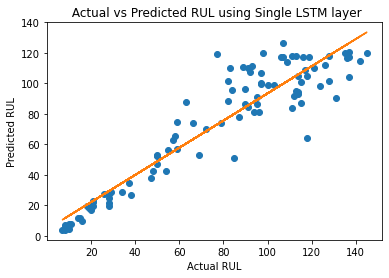

In [59]:
x = np.array([y_test]).flatten()
y = np.array(testPredict).flatten()

m, b = np.polyfit(x, y, 1)
#m = slope, b = intercept
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using Single LSTM layer")
plt.show()

test set RMSE:13.406325277036318, R2:0.8959217549294383


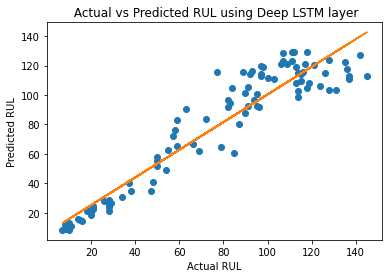

In [96]:
model = create_model_dlstm()

model.load_weights("2layer_nn_22\weights-improvement-05-104.35.hdf5")
model.compile(optimizer='adam', loss='mse')
testPredict=model.predict(test_array)
performance(y_test,testPredict)

x = np.array([y_test]).flatten()
y = np.array(testPredict).flatten()

m, b = np.polyfit(x, y, 1)
#m = slope, b = intercept
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using Deep LSTM layer")
plt.show()

### Implementing Dimension Reduction technique
### PCA

In [70]:
x_train_pca = x_train_df_sc.drop(columns='engine_number')
x_train_pca.head()

,cycle,oper_set1,oper_set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21
0,0.00000,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.713178,0.724662
1,0.00277,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.666667,0.731014
2,0.00554,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.627907,0.621375
3,0.00831,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.573643,0.662386
4,0.01108,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.589147,0.704502


Text(0, 0.5, 'cumulative explained variance')

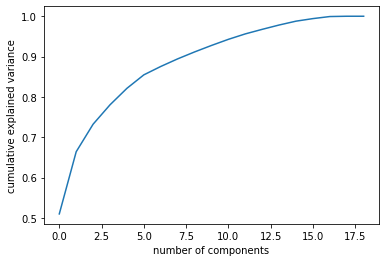

In [71]:
pca = PCA().fit(x_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [72]:
##Function for returning train and test dataframe after applying PCA dimension reduction technique

def pca_transform_train(scaled_df_train,components):
    x_train_pca = scaled_df_train.drop(columns='engine_number')
    pca= PCA(n_components = components)
    x_train_pca_trans=pca.fit_transform(x_train_pca)
    x_train_pca_df =  pd.DataFrame(x_train_pca_trans)
    x_train_pca_df['engine_number'] = scaled_df_train[['engine_number']]
       
    return x_train_pca_df,pca

def pca_transform_test(pca,test_scaled):
    x_test_pca = test_scaled.drop(columns=["engine_number"])
    x_test_pca_df = pd.DataFrame(pca.transform(x_test_pca))
    x_test_pca_df['engine_number'] = x_test_df_sc['engine_number']
    return x_test_pca_df

In [76]:
x_train_pca_df,pca = pca_transform_train(x_train_df_sc,15)
x_test_pca_df = pca_transform_test(pca,x_test_df_sc)

In [77]:
seq_cols_nw = [i for i in range(x_train_pca_df.shape[1]-1)]

feature_train_pca, feature_val_pca, train_num,val_num = data_train_val_lstm(x_train_pca_df,0.10,seq_length,seq_cols_nw)
label_train_pca,label_val_pca = label_train_val_lstm(data_train_nw,seq_length,train_num,val_num)
print("shape of x_train is {} and x_validation is {}".format(feature_train_pca.shape,feature_val_pca.shape))
print("shape of y_train is {} and y_validation is {}".format(label_train_pca.shape,label_val_pca.shape))

shape of x_train is (14398, 50, 15) and x_validation is (1333, 50, 15)
shape of y_train is (14398, 1) and y_validation is (1333, 1)


In [78]:
test_array_pca = data_test_lstm(x_test_pca_df,seq_length)
test_array_pca.shape

(100, 50, 15)

In [224]:
## Fixed parameter - Seq_length = 50
## Fixed parameter - Number of Principle components = 12

filepath1="pca_1/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)
callbacks_list = [checkpoint,early_stop]

node = [32,64]
batch_size = [32,64]
RMSE = []
row = []
column = ["node","batch"]
for i in product(node,batch_size):
    node_x,batch_size_x=i
    row.append(list(i))
    print("-------------------------------------------------------")
    print("node is {} and batch is {}".format(node_x,batch_size_x))
    # define model
    model = Sequential()
    model.add(LSTM(node_x, activation='tanh', input_shape=(None,12),return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(
        feature_train_pca,label_train_pca,
        epochs=15,batch_size=batch_size_x,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)
    model.save_weights("pca_1_model/"+str(i)+"pca_simple.h5")
    testPredict = model.predict(test_array_pca)
    mse=mean_squared_error(y_test,testPredict)
    rmse=np.sqrt(mse)
    RMSE.append(rmse)

parameter_df_pca = pd.DataFrame(row,columns = column)
parameter_df_pca['RMSE']=RMSE

-------------------------------------------------------
node is 32 and batch is 32
Epoch 1/15
441/441 [==============================] - 15s 28ms/step - loss: 5593.4941 - val_loss: 4797.9146

Epoch 00001: val_loss improved from inf to 4797.91455, saving model to pca_1\weights-improvement-01-4797.91.hdf5
Epoch 2/15
441/441 [==============================] - 14s 31ms/step - loss: 3929.8086 - val_loss: 3531.6438

Epoch 00002: val_loss improved from 4797.91455 to 3531.64380, saving model to pca_1\weights-improvement-02-3531.64.hdf5
Epoch 3/15
441/441 [==============================] - 15s 34ms/step - loss: 2921.8523 - val_loss: 2558.2798

Epoch 00003: val_loss improved from 3531.64380 to 2558.27979, saving model to pca_1\weights-improvement-03-2558.28.hdf5
Epoch 4/15
441/441 [==============================] - 15s 34ms/step - loss: 2052.4927 - val_loss: 1822.4896

Epoch 00004: val_loss improved from 2558.27979 to 1822.48962, saving model to pca_1\weights-improvement-04-1822.49.hdf5
Epoch 5/

441/441 [==============================] - 42s 96ms/step - loss: 105.9000 - val_loss: 113.3340

Epoch 00014: val_loss did not improve from 104.42021
Epoch 15/15
441/441 [==============================] - 46s 104ms/step - loss: 111.4423 - val_loss: 110.8909

Epoch 00015: val_loss did not improve from 104.42021
-------------------------------------------------------
node is 64 and batch is 64
Epoch 1/15
221/221 [==============================] - 28s 117ms/step - loss: 5392.8921 - val_loss: 4561.6934

Epoch 00001: val_loss did not improve from 104.42021
Epoch 2/15
221/221 [==============================] - 23s 106ms/step - loss: 3765.8540 - val_loss: 3409.0046

Epoch 00002: val_loss did not improve from 104.42021
Epoch 3/15
221/221 [==============================] - 25s 113ms/step - loss: 2875.3621 - val_loss: 2674.6255

Epoch 00003: val_loss did not improve from 104.42021
Epoch 4/15
221/221 [==============================] - 22s 99ms/step - loss: 2326.3584 - val_loss: 2227.4370

Epoch 00

In [225]:

parameter_df_pca

,node,batch,RMSE
0,32,32,19.011831
1,32,64,26.019766
2,64,32,17.016256
3,64,64,22.327154


In [226]:
m = [str("pca_1\\")+ str(i) for i in listdir("pca_1")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))

pca_1\weights-improvement-01-4797.91.hdf5
test set RMSE:68.13288050037346, R2:-1.688152831735628
None
pca_1\weights-improvement-02-3531.64.hdf5
test set RMSE:58.42344714338745, R2:-0.9765818890529938
None
pca_1\weights-improvement-03-2558.28.hdf5
test set RMSE:49.82070986933391, R2:-0.43734253697230274
None
pca_1\weights-improvement-04-1822.49.hdf5
test set RMSE:42.00121367377272, R2:-0.021560603110919674
None
pca_1\weights-improvement-05-1326.35.hdf5
test set RMSE:35.8534496883254, R2:0.2556068770025943
None
pca_1\weights-improvement-06-986.50.hdf5
test set RMSE:30.830431924711494, R2:0.4495730698691611
None
pca_1\weights-improvement-07-691.43.hdf5
test set RMSE:24.91770379308967, R2:0.6404523176966255
None
pca_1\weights-improvement-08-461.36.hdf5
test set RMSE:23.30804023005245, R2:0.6854048856000803
None
pca_1\weights-improvement-09-132.29.hdf5
test set RMSE:17.20943760118279, R2:0.828496174494586
None
pca_1\weights-improvement-09-330.39.hdf5
test set RMSE:20.711845316651427, R2:0.7

In [250]:
### Two layer of LSTM

filepath1="pca_twolayerdeeplstm/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

### increasing dense layer

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(None,12),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(None,12),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='Adamax', loss='mse')

model.fit(
        feature_train_pca,label_train_pca,
        epochs=15,batch_size=64,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)


Epoch 1/15
221/221 [==============================] - 25s 93ms/step - loss: 4268.8110 - val_loss: 2237.5667

Epoch 00001: val_loss improved from inf to 2237.56665, saving model to pca_2layer_23jul\weights-improvement-01-2237.57.hdf5
Epoch 2/15
221/221 [==============================] - 18s 82ms/step - loss: 1412.3839 - val_loss: 861.2435

Epoch 00002: val_loss improved from 2237.56665 to 861.24347, saving model to pca_2layer_23jul\weights-improvement-02-861.24.hdf5
Epoch 3/15
221/221 [==============================] - 18s 82ms/step - loss: 577.2787 - val_loss: 335.2750

Epoch 00003: val_loss improved from 861.24347 to 335.27496, saving model to pca_2layer_23jul\weights-improvement-03-335.27.hdf5
Epoch 4/15
221/221 [==============================] - 18s 83ms/step - loss: 316.5115 - val_loss: 201.1550

Epoch 00004: val_loss improved from 335.27496 to 201.15498, saving model to pca_2layer_23jul\weights-improvement-04-201.15.hdf5
Epoch 5/15
221/221 [==============================] - 18s 82

In [254]:
testPredict=model.predict(test_array_pca)
model.save_weights("withadamax14.85_32_64_8.h5")
print(performance(y_test,testPredict))

test set RMSE:14.854337872387552, R2:0.8722246580592725
None


In [257]:
model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(None,12),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(None,12),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
# model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='Adamax', loss='mse')
model.load_weights("withadamax14.85_32_64_8.h5")

testPredict=model.predict(test_array_pca)
# model.save_weights("withadamax14.85_32_64_8.h5")
print(performance(y_test,testPredict))

test set RMSE:14.854337872387552, R2:0.8722246580592725
None


In [266]:
### Two layer of LSTM

filepath1="pca_2layer_23jul/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

### increasing dense layer

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(None,12),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(None,12),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
# model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='nadam', loss='mse')

model.fit(
        feature_train_pca,label_train_pca,
        epochs=15,batch_size=64,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)


Epoch 1/15
221/221 [==============================] - 49s 175ms/step - loss: 3551.7625 - val_loss: 1632.4885

Epoch 00001: val_loss improved from inf to 1632.48853, saving model to pca_2layer_23jul\weights-improvement-01-1632.49.hdf5
Epoch 2/15
221/221 [==============================] - 57s 258ms/step - loss: 626.9059 - val_loss: 219.5417

Epoch 00002: val_loss improved from 1632.48853 to 219.54173, saving model to pca_2layer_23jul\weights-improvement-02-219.54.hdf5
Epoch 3/15
221/221 [==============================] - 50s 226ms/step - loss: 228.4958 - val_loss: 168.1655

Epoch 00003: val_loss improved from 219.54173 to 168.16551, saving model to pca_2layer_23jul\weights-improvement-03-168.17.hdf5
Epoch 4/15
221/221 [==============================] - 58s 260ms/step - loss: 184.4381 - val_loss: 163.2731

Epoch 00004: val_loss improved from 168.16551 to 163.27312, saving model to pca_2layer_23jul\weights-improvement-04-163.27.hdf5
Epoch 5/15
221/221 [==============================] - 50s

In [265]:
# model = load_model("pca_2layer_23jul\weights-improvement-03-172.81.hdf5")
testPredict = model.predict(test_array_pca)
performance(testPredict,y_test)

test set RMSE:15.038359204542267, R2:0.8659876626538408


In [273]:
## PCA - 12 ## seq_length = 50

In [299]:
x_train_pca_df,pca = pca_transform_train(x_train_df_sc,15)
x_test_pca_df = pca_transform_test(pca,x_test_df_sc)

In [301]:
seq_cols_nw = [i for i in range(x_train_pca_df.shape[1]-1)]

feature_train_pca, feature_val_pca, train_num,val_num = data_train_val_lstm(x_train_pca_df,0.10,seq_length,seq_cols_nw)
label_train_pca,label_val_pca = label_train_val_lstm(data_train_nw,seq_length,train_num,val_num)
print("shape of x_train is {} and x_validation is {}".format(feature_train_pca.shape,feature_val_pca.shape))
print("shape of y_train is {} and y_validation is {}".format(label_train_pca.shape,label_val_pca.shape))

shape of x_train is (14268, 50, 15) and x_validation is (1463, 50, 15)
shape of y_train is (14268, 1) and y_validation is (1463, 1)


In [302]:
test_array_pca = data_test_lstm(x_test_pca_df,seq_length)
test_array_pca.shape

(100, 50, 15)

In [278]:
## same architecture as deep lSTM+NN
##  
filepath1="pca_2layer_23jul/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(None,12),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(None,12),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)



Epoch 1/15
450/450 [==============================] - 93s 188ms/step - loss: 1170.6825 - val_loss: 208.2885

Epoch 00001: val_loss improved from inf to 208.28851, saving model to pca_2layer_23jul\weights-improvement-01-208.29.hdf5
Epoch 2/15
450/450 [==============================] - 53s 117ms/step - loss: 179.2430 - val_loss: 240.1622

Epoch 00002: val_loss did not improve from 208.28851
Epoch 3/15
450/450 [==============================] - 54s 119ms/step - loss: 152.5358 - val_loss: 235.5603

Epoch 00003: val_loss did not improve from 208.28851
Epoch 4/15
450/450 [==============================] - 60s 133ms/step - loss: 147.7391 - val_loss: 276.6812

Epoch 00004: val_loss did not improve from 208.28851
Epoch 5/15
450/450 [==============================] - 57s 127ms/step - loss: 138.6934 - val_loss: 281.4681

Epoch 00005: val_loss did not improve from 208.28851
Epoch 6/15
450/450 [==============================] - 51s 114ms/step - loss: 134.6167 - val_loss: 219.5481

Epoch 00006: val_

In [279]:
testPredict = model.predict(test_array_pca)
performance(testPredict,y_test)

test set RMSE:15.007306524346252, R2:0.8582563792466831


In [280]:
model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
450/450 [==============================] - 77s 170ms/step - loss: 129.1637 - val_loss: 253.6380

Epoch 00001: val_loss did not improve from 208.28851
Epoch 2/15
450/450 [==============================] - 65s 144ms/step - loss: 120.8436 - val_loss: 247.3765

Epoch 00002: val_loss did not improve from 208.28851
Epoch 3/15
450/450 [==============================] - 48s 106ms/step - loss: 120.1294 - val_loss: 289.9358

Epoch 00003: val_loss did not improve from 208.28851
Epoch 4/15
450/450 [==============================] - 50s 111ms/step - loss: 112.2242 - val_loss: 261.8614

Epoch 00004: val_loss did not improve from 208.28851
Epoch 5/15
450/450 [==============================] - 47s 105ms/step - loss: 108.0693 - val_loss: 248.3843

Epoch 00005: val_loss did not improve from 208.28851
Epoch 6/15
450/450 [==============================] - 46s 101ms/step - loss: 104.9333 - val_loss: 245.2023

Epoch 00006: val_loss did not improve from 208.28851
Epoch 7/15
450/450 [==============

In [281]:
# model1 = load_model("pca_2layer_23jul\weights-improvement-11-122.02.hdf5") 
testPredict = model.predict(test_array_pca)
performance(testPredict,y_test) ##  Pca = 12, seq_lenth = 50

test set RMSE:14.31145284203001, R2:0.8759223996589847


In [296]:
feature_train_pca.shape

(14279, 50, 10)

In [316]:
## PCA = 10 component seq=50

filepath1="pca_2layer_23jul_10/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,10),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,10),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)


Epoch 1/15
445/445 [==============================] - 44s 78ms/step - loss: 1490.1427 - val_loss: 200.8081

Epoch 00001: val_loss improved from inf to 200.80809, saving model to pca_2layer_23jul_10\weights-improvement-01-200.81.hdf5
Epoch 2/15
445/445 [==============================] - 27s 60ms/step - loss: 208.4740 - val_loss: 136.2678

Epoch 00002: val_loss improved from 200.80809 to 136.26779, saving model to pca_2layer_23jul_10\weights-improvement-02-136.27.hdf5
Epoch 3/15
445/445 [==============================] - 27s 60ms/step - loss: 159.1137 - val_loss: 139.9292

Epoch 00003: val_loss did not improve from 136.26779
Epoch 4/15
445/445 [==============================] - 27s 60ms/step - loss: 157.7966 - val_loss: 129.2709

Epoch 00004: val_loss improved from 136.26779 to 129.27086, saving model to pca_2layer_23jul_10\weights-improvement-04-129.27.hdf5
Epoch 5/15
445/445 [==============================] - 26s 59ms/step - loss: 149.9774 - val_loss: 116.6196

Epoch 00005: val_loss im

In [317]:
testPredict = model.predict(test_array_pca)
performance(testPredict,y_test)

test set RMSE:14.617609476057572, R2:0.8655326482245159


In [318]:
m = [str("pca_2layer_23jul_10\\")+ str(i) for i in listdir("pca_2layer_23jul_10")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))


pca_2layer_23jul_10\weights-improvement-01-200.81.hdf5
test set RMSE:15.05563299038608, R2:0.8687381579123278
None
pca_2layer_23jul_10\weights-improvement-02-136.27.hdf5
test set RMSE:14.563390377238651, R2:0.8771810336577542
None
pca_2layer_23jul_10\weights-improvement-04-129.27.hdf5
test set RMSE:14.580949023341907, R2:0.876884696782377
None
pca_2layer_23jul_10\weights-improvement-05-116.62.hdf5
test set RMSE:15.116941913606547, R2:0.8676669432252705
None


In [319]:
model = load_model("pca_2layer_23jul_10\weights-improvement-02-136.27.hdf5")
model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)


Epoch 1/15
445/445 [==============================] - 49s 100ms/step - loss: 165.7319 - val_loss: 161.5312

Epoch 00001: val_loss did not improve from 116.61957
Epoch 2/15
445/445 [==============================] - 27s 60ms/step - loss: 154.7374 - val_loss: 130.2792

Epoch 00002: val_loss did not improve from 116.61957
Epoch 3/15
445/445 [==============================] - 27s 60ms/step - loss: 152.4730 - val_loss: 160.3937

Epoch 00003: val_loss did not improve from 116.61957
Epoch 4/15
445/445 [==============================] - 27s 60ms/step - loss: 145.5779 - val_loss: 142.2540

Epoch 00004: val_loss did not improve from 116.61957
Epoch 5/15
445/445 [==============================] - 27s 60ms/step - loss: 138.4895 - val_loss: 127.5837

Epoch 00005: val_loss did not improve from 116.61957
Epoch 6/15
445/445 [==============================] - 27s 60ms/step - loss: 128.0541 - val_loss: 148.1553

Epoch 00006: val_loss did not improve from 116.61957
Epoch 7/15
445/445 [===================

In [320]:
testPredict = model.predict(test_array_pca)
performance(testPredict,y_test)

test set RMSE:14.365248461225615, R2:0.8723627131757794


In [292]:
m = [str("pca_2layer_23jul_15\\")+ str(i) for i in listdir("pca_2layer_23jul_15")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))


pca_2layer_23jul_15\weights-improvement-01-168.99.hdf5
test set RMSE:15.294128031940257, R2:0.8645466037172808
None
pca_2layer_23jul_15\weights-improvement-03-127.47.hdf5
test set RMSE:14.373938195218331, R2:0.8803557030363169
None
pca_2layer_23jul_15\weights-improvement-03-133.54.hdf5
test set RMSE:14.168310115520528, R2:0.8837543891388433
None


In [303]:
## PCA = 15 component seq=50

filepath1="pca_2layer_23jul_15/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,15),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,15),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
446/446 [==============================] - 44s 76ms/step - loss: 1882.9677 - val_loss: 406.6267

Epoch 00001: val_loss improved from inf to 406.62668, saving model to pca_2layer_23jul_15\weights-improvement-01-406.63.hdf5
Epoch 2/15
446/446 [==============================] - 27s 60ms/step - loss: 263.1607 - val_loss: 194.1247

Epoch 00002: val_loss improved from 406.62668 to 194.12468, saving model to pca_2layer_23jul_15\weights-improvement-02-194.12.hdf5
Epoch 3/15
446/446 [==============================] - 27s 60ms/step - loss: 188.2241 - val_loss: 193.3802

Epoch 00003: val_loss improved from 194.12468 to 193.38017, saving model to pca_2layer_23jul_15\weights-improvement-03-193.38.hdf5
Epoch 4/15
446/446 [==============================] - 27s 60ms/step - loss: 165.7726 - val_loss: 202.6575

Epoch 00004: val_loss did not improve from 193.38017
Epoch 5/15
446/446 [==============================] - 27s 61ms/step - loss: 154.6669 - val_loss: 203.5763

Epoch 00005: val_loss di

In [304]:
testPredict = model.predict(test_array_pca)
performance(testPredict,y_test)

test set RMSE:14.335129282684257, R2:0.8833046674586895


In [306]:

## list of saved model which resulted in the improved result from training the loaded model(node=64,epoch=10,batch_size=32)
k = ["weights-improvement-03-193.38.hdf5","weights-improvement-02-194.12.hdf5","weights-improvement-01-406.63.hdf5"]
m = [str("pca_2layer_23jul_15\\")+ str(i) for i in k] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))



pca_2layer_23jul_15\weights-improvement-03-193.38.hdf5
test set RMSE:14.842349209037254, R2:0.8724308250935631
None
pca_2layer_23jul_15\weights-improvement-02-194.12.hdf5
test set RMSE:14.404207482817764, R2:0.8798512677459471
None
pca_2layer_23jul_15\weights-improvement-01-406.63.hdf5
test set RMSE:20.055358389124734, R2:0.7670829342781668
None


In [308]:
model=load_model("pca_2layer_23jul_15/weights-improvement-02-194.12.hdf5")
model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
446/446 [==============================] - 31s 64ms/step - loss: 183.7695 - val_loss: 254.6785

Epoch 00001: val_loss did not improve from 193.38017
Epoch 2/15
446/446 [==============================] - 27s 61ms/step - loss: 165.8703 - val_loss: 260.7017

Epoch 00002: val_loss did not improve from 193.38017
Epoch 3/15
446/446 [==============================] - 27s 61ms/step - loss: 150.8783 - val_loss: 179.6872

Epoch 00003: val_loss improved from 193.38017 to 179.68724, saving model to pca_2layer_23jul_15\weights-improvement-03-179.69.hdf5
Epoch 4/15
446/446 [==============================] - 27s 61ms/step - loss: 148.8246 - val_loss: 239.9077

Epoch 00004: val_loss did not improve from 179.68724
Epoch 5/15
446/446 [==============================] - 27s 61ms/step - loss: 138.5646 - val_loss: 186.1591

Epoch 00005: val_loss did not improve from 179.68724
Epoch 6/15
446/446 [==============================] - 27s 61ms/step - loss: 135.7800 - val_loss: 186.0443

Epoch 00006: va

In [312]:
model = load_model("pca_2layer_23jul_15\weights-improvement-10-157.98.hdf5")
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

test set RMSE:14.158478585622474, R2:0.8839156611133057
None


In [324]:
## PCA = 17 component seq=50

filepath1="pca_2layer_23jul_17/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,17),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,17),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
441/441 [==============================] - 47s 89ms/step - loss: 1414.0129 - val_loss: 238.6253

Epoch 00001: val_loss improved from inf to 238.62532, saving model to pca_2layer_23jul_17\weights-improvement-01-238.63.hdf5
Epoch 2/15
441/441 [==============================] - 28s 63ms/step - loss: 177.2348 - val_loss: 156.7111

Epoch 00002: val_loss improved from 238.62532 to 156.71107, saving model to pca_2layer_23jul_17\weights-improvement-02-156.71.hdf5
Epoch 3/15
441/441 [==============================] - 28s 63ms/step - loss: 150.7884 - val_loss: 167.0475

Epoch 00003: val_loss did not improve from 156.71107
Epoch 4/15
441/441 [==============================] - 28s 63ms/step - loss: 144.0050 - val_loss: 136.9264

Epoch 00004: val_loss improved from 156.71107 to 136.92636, saving model to pca_2layer_23jul_17\weights-improvement-04-136.93.hdf5
Epoch 5/15
441/441 [==============================] - 28s 63ms/step - loss: 134.0546 - val_loss: 253.9296

Epoch 00005: val_loss di

In [325]:
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))


test set RMSE:15.667119246076059, R2:0.8578592005610807
None


In [334]:
model=load_model("pca_2layer_23jul_17\weights-improvement-02-156.71.hdf5")
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

test set RMSE:14.314660837196758, R2:0.8813404817109672
None


In [ ]:
### Implementation with seq_length = 30

In [338]:
## PCA transformed dataframe
x_train_pca_df,pca = pca_transform_train(x_train_df_sc,12)
x_test_pca = pca_transform_test(pca,x_test_df_sc)


In [339]:
seq_cols_nw = [i for i in range(x_train_pca_df.shape[1]-1)]
seq_length=30
feature_train_pca, feature_val_pca, train_num,val_num = data_train_val_lstm(x_train_pca_df,0.10,seq_length,seq_cols_nw)
label_train_pca,label_val_pca = label_train_val_lstm(data_train_nw,seq_length,train_num,val_num)
print("shape of x_train is {} and x_validation is {}".format(feature_train_pca.shape,feature_val_pca.shape))
print("shape of y_train is {} and y_validation is {}".format(label_train_pca.shape,label_val_pca.shape))

shape of x_train is (16121, 30, 12) and x_validation is (1610, 30, 12)
shape of y_train is (16121, 1) and y_validation is (1610, 1)


In [341]:
test_array_pca = data_test_lstm(x_test_pca,seq_length)
test_array_pca.shape

(100, 30, 12)

In [347]:
## PCA = 12 component seq=30

filepath1="pca_2layer_23jul_12_seq30/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,12),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,12),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
504/504 [==============================] - 25s 41ms/step - loss: 1366.5726 - val_loss: 246.5158

Epoch 00001: val_loss improved from inf to 246.51579, saving model to pca_2layer_23jul_12_seq30\weights-improvement-01-246.52.hdf5
Epoch 2/15
504/504 [==============================] - 19s 38ms/step - loss: 239.5787 - val_loss: 224.3240

Epoch 00002: val_loss improved from 246.51579 to 224.32404, saving model to pca_2layer_23jul_12_seq30\weights-improvement-02-224.32.hdf5
Epoch 3/15
504/504 [==============================] - 19s 38ms/step - loss: 218.1569 - val_loss: 247.1544

Epoch 00003: val_loss did not improve from 224.32404
Epoch 4/15
504/504 [==============================] - 19s 38ms/step - loss: 206.5254 - val_loss: 243.9985

Epoch 00004: val_loss did not improve from 224.32404
Epoch 5/15
504/504 [==============================] - 19s 37ms/step - loss: 192.1155 - val_loss: 259.6419

Epoch 00005: val_loss did not improve from 224.32404
Epoch 6/15
504/504 [=================

In [348]:
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

test set RMSE:16.879778645517025, R2:0.8350037969736379
None


In [349]:
### Seq_length = 30, pca=12

m = [str("pca_2layer_23jul_12_seq30\\")+ str(i) for i in listdir("pca_2layer_23jul_12_seq30")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))

pca_2layer_23jul_12_seq30\weights-improvement-02-224.32.hdf5
test set RMSE:15.52965778512944, R2:0.860342511719917
None
pca_2layer_23jul_12_seq30\weights-improvement-06-202.59.hdf5
test set RMSE:15.425564569254293, R2:0.8622084480031188
None
pca_2layer_23jul_12_seq30\weights-improvement-10-197.61.hdf5
test set RMSE:16.698245218701345, R2:0.8385336140123827
None


In [355]:
## PCA = 15 component seq=30

filepath1="pca_2layer_23jul_15_seq30/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,15),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,15),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
494/494 [==============================] - 24s 40ms/step - loss: 1607.2444 - val_loss: 242.8096

Epoch 00001: val_loss improved from inf to 242.80962, saving model to pca_2layer_23jul_15_seq30\weights-improvement-01-242.81.hdf5
Epoch 2/15
494/494 [==============================] - 19s 38ms/step - loss: 222.5266 - val_loss: 205.9628

Epoch 00002: val_loss improved from 242.80962 to 205.96278, saving model to pca_2layer_23jul_15_seq30\weights-improvement-02-205.96.hdf5
Epoch 3/15
494/494 [==============================] - 19s 38ms/step - loss: 205.3170 - val_loss: 306.8911

Epoch 00003: val_loss did not improve from 205.96278
Epoch 4/15
494/494 [==============================] - 19s 38ms/step - loss: 193.7310 - val_loss: 183.0423

Epoch 00004: val_loss improved from 205.96278 to 183.04231, saving model to pca_2layer_23jul_15_seq30\weights-improvement-04-183.04.hdf5
Epoch 5/15
494/494 [==============================] - 18s 37ms/step - loss: 186.7800 - val_loss: 244.1805

Epoch 

In [356]:
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

test set RMSE:15.49873662020068, R2:0.8608981032370078
None


In [357]:
m = [str("pca_2layer_23jul_15_seq30\\")+ str(i) for i in listdir("pca_2layer_23jul_15_seq30")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))

pca_2layer_23jul_15_seq30\weights-improvement-01-242.81.hdf5
test set RMSE:15.397515462458413, R2:0.8627090995077764
None
pca_2layer_23jul_15_seq30\weights-improvement-02-205.96.hdf5
test set RMSE:14.942722191287244, R2:0.870699590469374
None
pca_2layer_23jul_15_seq30\weights-improvement-04-183.04.hdf5
test set RMSE:14.76241437831229, R2:0.8738011959461204
None
pca_2layer_23jul_15_seq30\weights-improvement-06-182.07.hdf5
test set RMSE:15.580149259745529, R2:0.8594329004599136
None


In [358]:
model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
494/494 [==============================] - 23s 40ms/step - loss: 167.9885 - val_loss: 261.1882

Epoch 00001: val_loss did not improve from 182.07472
Epoch 2/15
494/494 [==============================] - 19s 38ms/step - loss: 160.2531 - val_loss: 206.0578

Epoch 00002: val_loss did not improve from 182.07472
Epoch 3/15
494/494 [==============================] - 20s 41ms/step - loss: 149.9420 - val_loss: 202.3530

Epoch 00003: val_loss did not improve from 182.07472
Epoch 4/15
494/494 [==============================] - 18s 37ms/step - loss: 144.9432 - val_loss: 202.5209

Epoch 00004: val_loss did not improve from 182.07472
Epoch 5/15
494/494 [==============================] - 19s 38ms/step - loss: 139.1228 - val_loss: 273.5756

Epoch 00005: val_loss did not improve from 182.07472
Epoch 6/15
494/494 [==============================] - 19s 38ms/step - loss: 137.7427 - val_loss: 226.5579

Epoch 00006: val_loss did not improve from 182.07472
Epoch 7/15
494/494 [====================

In [360]:
m = [str("pca_2layer_23jul_15_seq30\\")+ str(i) for i in listdir("pca_2layer_23jul_15_seq30")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))

pca_2layer_23jul_15_seq30\weights-improvement-01-242.81.hdf5
test set RMSE:15.397515462458413, R2:0.8627090995077764
None
pca_2layer_23jul_15_seq30\weights-improvement-02-205.96.hdf5
test set RMSE:14.942722191287244, R2:0.870699590469374
None
pca_2layer_23jul_15_seq30\weights-improvement-04-183.04.hdf5
test set RMSE:14.76241437831229, R2:0.8738011959461204
None
pca_2layer_23jul_15_seq30\weights-improvement-06-182.07.hdf5
test set RMSE:15.580149259745529, R2:0.8594329004599136
None


In [364]:
## PCA = 17 component seq=30

filepath1="pca_2layer_23jul_17_seq30/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,17),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,17),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
489/489 [==============================] - 42s 69ms/step - loss: 1323.9865 - val_loss: 425.1143

Epoch 00001: val_loss improved from inf to 425.11435, saving model to pca_2layer_23jul_17_seq30\weights-improvement-01-425.11.hdf5
Epoch 2/15
489/489 [==============================] - 25s 51ms/step - loss: 233.3122 - val_loss: 231.7016

Epoch 00002: val_loss improved from 425.11435 to 231.70157, saving model to pca_2layer_23jul_17_seq30\weights-improvement-02-231.70.hdf5
Epoch 3/15
489/489 [==============================] - 19s 38ms/step - loss: 204.5394 - val_loss: 224.3607

Epoch 00003: val_loss improved from 231.70157 to 224.36067, saving model to pca_2layer_23jul_17_seq30\weights-improvement-03-224.36.hdf5
Epoch 4/15
489/489 [==============================] - 18s 37ms/step - loss: 200.6305 - val_loss: 252.6114

Epoch 00004: val_loss did not improve from 224.36067
Epoch 5/15
489/489 [==============================] - 18s 36ms/step - loss: 183.1842 - val_loss: 229.9177

Epoch 

In [365]:
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

test set RMSE:15.524046571036592, R2:0.8604434162604327
None


In [366]:
m = [str("pca_2layer_23jul_17_seq30\\")+ str(i) for i in listdir("pca_2layer_23jul_17_seq30")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))

pca_2layer_23jul_17_seq30\weights-improvement-01-425.11.hdf5
test set RMSE:17.974238022086208, R2:0.812913938334076
None
pca_2layer_23jul_17_seq30\weights-improvement-02-231.70.hdf5
test set RMSE:15.518837640792663, R2:0.8605370540304356
None
pca_2layer_23jul_17_seq30\weights-improvement-03-224.36.hdf5
test set RMSE:15.203559673870181, R2:0.86614610231315
None
pca_2layer_23jul_17_seq30\weights-improvement-06-206.30.hdf5
test set RMSE:15.185276029009906, R2:0.8664678513784579
None


In [377]:
## PCA = 10 component seq=30

filepath1="pca_2layer_23jul_10_seq30/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,10),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,10),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
504/504 [==============================] - 77s 129ms/step - loss: 1449.4688 - val_loss: 275.4176

Epoch 00001: val_loss improved from inf to 275.41763, saving model to pca_2layer_23jul_10_seq30\weights-improvement-01-275.42.hdf5
Epoch 2/15
504/504 [==============================] - 50s 98ms/step - loss: 227.5670 - val_loss: 228.7518

Epoch 00002: val_loss improved from 275.41763 to 228.75182, saving model to pca_2layer_23jul_10_seq30\weights-improvement-02-228.75.hdf5
Epoch 3/15
504/504 [==============================] - 48s 94ms/step - loss: 211.6652 - val_loss: 192.8695

Epoch 00003: val_loss improved from 228.75182 to 192.86946, saving model to pca_2layer_23jul_10_seq30\weights-improvement-03-192.87.hdf5
Epoch 4/15
504/504 [==============================] - 44s 87ms/step - loss: 201.7521 - val_loss: 176.6997

Epoch 00004: val_loss improved from 192.86946 to 176.69974, saving model to pca_2layer_23jul_10_seq30\weights-improvement-04-176.70.hdf5
Epoch 5/15
504/504 [========

In [378]:
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

test set RMSE:14.827071504426963, R2:0.8726933119921794
None


In [398]:
## PCA = 12 component seq=70

filepath1="pca_2layer_23jul_15_seq70/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,15),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,15),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_pca,label_train_pca,
        epochs=15,batch_size=32,
        validation_data = (feature_val_pca,label_val_pca),
        callbacks = callbacks_list)

Epoch 1/15
389/389 [==============================] - 46s 100ms/step - loss: 1676.6105 - val_loss: 495.0483

Epoch 00001: val_loss improved from inf to 495.04828, saving model to pca_2layer_23jul_15_seq70\weights-improvement-01-495.05.hdf5
Epoch 2/15
389/389 [==============================] - 32s 82ms/step - loss: 161.6107 - val_loss: 171.0808

Epoch 00002: val_loss improved from 495.04828 to 171.08076, saving model to pca_2layer_23jul_15_seq70\weights-improvement-02-171.08.hdf5
Epoch 3/15
389/389 [==============================] - 32s 82ms/step - loss: 122.6481 - val_loss: 153.3139

Epoch 00003: val_loss improved from 171.08076 to 153.31386, saving model to pca_2layer_23jul_15_seq70\weights-improvement-03-153.31.hdf5
Epoch 4/15
389/389 [==============================] - 32s 83ms/step - loss: 109.1610 - val_loss: 123.2606

Epoch 00004: val_loss improved from 153.31386 to 123.26058, saving model to pca_2layer_23jul_15_seq70\weights-improvement-04-123.26.hdf5
Epoch 5/15
389/389 [========

In [399]:
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

test set RMSE:26.81376024984522, R2:0.583652559095267
None


In [400]:
m = [str("pca_2layer_23jul_15_seq70\\")+ str(i) for i in listdir("pca_2layer_23jul_15_seq70")] 
for i in m:
    print(i)
    model = load_model(i)
    testPredict=model.predict(test_array_pca)
    print(performance(y_test,testPredict))

pca_2layer_23jul_15_seq70\weights-improvement-01-495.05.hdf5
test set RMSE:20.69084591994899, R2:0.7520883424648451
None
pca_2layer_23jul_15_seq70\weights-improvement-02-171.08.hdf5
test set RMSE:22.384180085090374, R2:0.7098498241663664
None
pca_2layer_23jul_15_seq70\weights-improvement-03-153.31.hdf5
test set RMSE:23.126109956451295, R2:0.6902968459703757
None
pca_2layer_23jul_15_seq70\weights-improvement-04-123.26.hdf5
test set RMSE:23.230974349723752, R2:0.6874818056687528
None
pca_2layer_23jul_15_seq70\weights-improvement-07-120.26.hdf5
test set RMSE:24.006612239876258, R2:0.6662646494930615
None
pca_2layer_23jul_15_seq70\weights-improvement-09-119.76.hdf5
test set RMSE:25.564206648036755, R2:0.6215529756598143
None


In [386]:
model= load_model("pca_2layer_23jul_10_seq70\weights-improvement-02-149.08.hdf5")
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))  ## PCA = 12,seq_length = 70

test set RMSE:18.263283554902472, R2:0.8068484579224909
None


### Observation:

**Deep LSTM** :<br>
    
1) **Seq_length=30** <BR>
PCA = 10 ----> RMSE : 14.82 <br>
PCA = 12 -----> RMSE : 15.42 <br>
PCA = 15 -----> RMSE : 14.76 <br>
PCA = 17 -----> RMSE : 15.18 <br>
    
2) **Seq_length=50** <BR>
PCA = 10 ----> RMSE : 14.36 <br>
PCA = 12 -----> RMSE : 14.31 <br>
PCA = 15 -----> RMSE : 14.15 <br>
PCA = 17 -----> RMSE : 14.31 <br>
    
3) **Seq_length=70** <BR>
PCA = 10 ----> RMSE : 18.26 <br>
PCA = 12 -----> RMSE : 22.90 <br>
PCA = 15 -----> RMSE : 20.69 <br>
    
    
The results with PCA reduction are not improved as compared to without using any dimension reduction. But we can observe that the best result are obtained at sequence_length = 50.


### Plot for actual vs predicted RUL using Deep LSTM model with PCA

test set RMSE:14.158477080358095, R2:0.8839156857964113
None


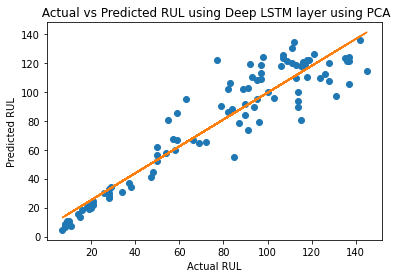

In [83]:
def create_model_pca(): 
    model = Sequential()
    model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_pca.shape[2])))
    model.add(LSTM(32, activation='tanh', input_shape=(None,15),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='tanh', input_shape=(None,15),return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(Dense(8))
    model.add(Dense(1))
    model.compile(optimizer='Adamax', loss='mse')
    return model

model = create_model_pca()
model.load_weights("pca_2layer_23jul_15\weights-improvement-10-157.98.hdf5")
testPredict=model.predict(test_array_pca)
print(performance(y_test,testPredict))

x = np.array([y_test]).flatten()
y = np.array(testPredict).flatten()

m, b = np.polyfit(x, y, 1)
#m = slope, b = intercept
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using Deep LSTM layer using PCA")
plt.show()

### Implementation using UMAP

In [85]:
"""function for creating sequnces inorder to input the lstm as per mentioned sequence length"""

def seq_generator(df, sequence_length, columns):
    data = df[columns].values
    num_elements = data.shape[0]

    seq_gen = []
    for start, stop in zip(range(0, num_elements-(sequence_length-1)), range(sequence_length, num_elements+1)):
        seq_gen.append(data[start:stop, :])

    return seq_gen


""" function for returning train set"""

def data_train_lstm(df,sequence_length, columns):
    engine_num = df['engine_number'].unique()    

    data_train_gen = [list(seq_generator(df[df['engine_number']==i], sequence_length, columns))
            for i in engine_num]
    data_array_train = np.concatenate(list(data_train_gen))
    
    return data_array_train

def label_train_lstm(df,sequence_length):

    unit_num = df['engine_number'].unique()  ## number of engine present in the dataset
    label_arr_train =[]
    
    for i in unit_num:
        data_engine = df[df['engine_number']==i]['RUL'].values ## data wrt to each engine
        num_elem = data_engine.shape[0]  ## number of rows
        label_data_train = []
        for start,stop in zip(range(0,num_elem-sequence_length+1),range(sequence_length,num_elem+1)):
            label_data_train.append([data_engine[start:stop][-1]])
        label_arr_train.append(label_data_train)  

    array_train = np.concatenate(label_arr_train)
    
    return array_train

def data_test_lstm(data_scaled_test,seq_length):
    test_unit = data_scaled_test['engine_number'].unique()
    data_arr_test = []
    for i in test_unit:  
        data_eng = data_scaled_test[data_scaled_test['engine_number']==i]
        data_eng = data_eng.drop(columns='engine_number').values
        num_elem = data_eng.shape[0]
        seq_arr_test = []
        if num_elem < seq_length:
            data_n = np.full((seq_length-num_elem,data_eng.shape[1]),fill_value=-100)
            data_eng = np.concatenate((data_n,data_eng),axis=0)
            data_arr_test.append(data_eng)
        else:
            data_n = data_eng[num_elem-seq_length:num_elem]
            data_arr_test.append(data_n)
    return np.array(data_arr_test)


In [88]:
##Function for returning train and test dataframe after applying umap dimension reduction technique

def umap_transform_train(scaled_df_train,n_neighbors,components):
    x_train_pca = scaled_df_train.drop(columns='engine_number')
    reducer=umap.UMAP(n_neighbors=n_neighbors,n_components=components,metric="manhattan")
    x_train_umap_trans=reducer.fit_transform(x_train_pca)
    x_train_umap_df =  pd.DataFrame(x_train_umap_trans)
    x_train_umap_df['engine_number'] = scaled_df_train[['engine_number']]
       
    return x_train_umap_df,reducer

def umap_transform_test(reducer,test_scaled):
    x_test_reducer = test_scaled.drop(columns=["engine_number"])
    x_test_reducer_df = pd.DataFrame(reducer.transform(x_test_reducer))
    x_test_reducer_df['engine_number'] = x_test_df_sc['engine_number']
    return x_test_reducer_df

In [95]:

## umap transformed dataframe
## The values are changed for different parameters (n_neighbors and n_components). The results are obtanied below with multiple run and models are saved for different parameter values.
features = 4
seq_length=50
x_train_reducer_df,reducer = umap_transform_train(x_train_df_sc,100,features)
x_test_reducer = umap_transform_test(reducer,x_test_df_sc)


In [97]:
seq_cols_nw = [i for i in range(x_train_reducer_df.shape[1]-1)]
seq_length = 50
feature_train_umap = data_train_lstm(x_train_reducer_df,seq_length,seq_cols_nw) ## Training data for input to lstm
label_train_umap = label_train_lstm(data_train_nw,seq_length) ## label data for input to lstm
print("shape of x_train is {} ".format(feature_train_umap.shape))
print("shape of y_train is {} ".format(label_train_umap.shape))

shape of x_train is (15731, 50, 4) 
shape of y_train is (15731, 1) 


In [98]:
## Transformed test set
test_array_reducer = data_test_lstm(x_test_reducer,seq_length)
test_array_reducer.shape

(100, 50, 4)

In [106]:
filepath1="umap/8Comp_15neigh_seq50/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath1,monitor='val_loss',verbose=1,save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss',patience = 5 ,verbose=1)

callbacks_list = [checkpoint,early_stop]

model = Sequential()
model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_umap.shape[2])))
model.add(LSTM(32, activation='tanh', input_shape=(seq_length,features),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(seq_length,features),return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# model.load_weights("withadamax14.85_32_64_8.h5")

model.fit(
feature_train_umap,label_train_umap,
        epochs=15,batch_size=32,
        validation_data = (test_array_reducer,y_test),
        callbacks = callbacks_list)

Train on 15731 samples, validate on 100 samples
Epoch 1/15
15712/15731 [============================>.] - ETA: 0s - loss: 1676.6909
Epoch 00001: val_loss improved from inf to 403.06728, saving model to umap/8Comp_15neigh_seq50/weights-improvement-01-403.07.hdf5
15731/15731 [==============================] - 55s 4ms/sample - loss: 1675.1091 - val_loss: 403.0673
Epoch 2/15
15712/15731 [============================>.] - ETA: 0s - loss: 248.0249
Epoch 00002: val_loss improved from 403.06728 to 277.22360, saving model to umap/8Comp_15neigh_seq50/weights-improvement-02-277.22.hdf5
15731/15731 [==============================] - 29s 2ms/sample - loss: 247.8871 - val_loss: 277.2236
Epoch 3/15
15712/15731 [============================>.] - ETA: 0s - loss: 199.1564
Epoch 00003: val_loss improved from 277.22360 to 222.07334, saving model to umap/8Comp_15neigh_seq50/weights-improvement-03-222.07.hdf5
15731/15731 [==============================] - 26s 2ms/sample - loss: 199.0843 - val_loss: 222.0733

In [104]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-06-216.64.hdf5") ## dimen=5, neighbor=200

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:14.71869426855342, R2:0.8745475854279053


In [92]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-12-190.51.hdf5") ## dimen=4, neighbor=100

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:13.80261468984637, R2:0.8896777311521594


In [107]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-09-176.88.hdf5") ## dimen=4, neighbor=100

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:13.299448292869311, R2:0.8975745911013174


In [99]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-07-190.49.hdf5") ## dimen=4, neighbor=200

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:13.801888724040275, R2:0.8896893359227644


In [94]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-03-197.36.hdf5") ## dimen=3, neighbor=100

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:14.048573202737035, R2:0.8857108787874538


In [88]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-04-215.31.hdf5") ## dimen=3, neighbor=150

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:14.673391217921992, R2:0.8753186634160505


In [81]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-08-176.28.hdf5") ## dimen=5, neighbor=150

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:13.277162801581708, R2:0.8979175659472464


In [74]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-04-259.99.hdf5") ## dimen=4, neighbor=150

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:16.124272397177922, R2:0.8494430845627291


In [75]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-12-186.28.hdf5") ## dimen=4, neighbor=120

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:15.265045297626093, R2:0.8650612600172146


In [59]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-13-174.07.hdf5") ## dimen=4, neighbor=100

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:13.193597082215904, R2:0.8991985243310462


In [193]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-03-205.67.hdf5") ## dimen=5, neighbor=20

testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:14.341304730971993, R2:0.880898348441249


In [187]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-02-203.32.hdf5")##dime=5, neighbor=50
testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:14.840166771088763, R2:0.8724683382035754


In [177]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-09-188.70.hdf5")##dime=5, neighbor=100
testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:13.736853710384398, R2:0.8907264625768491


In [176]:
# model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-05-262.10.hdf5")##
testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:16.015495171250514, R2:0.8514676003443754


In [167]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-05-262.10.hdf5")##
testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:16.189609623368263, R2:0.8482204679745023


In [160]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-06-227.70.hdf5") 
testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:15.08960906138192, R2:0.8681450518178446


In [154]:
## neighbor=50, dim =6 , seq=50
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-02-218.85.hdf5") 
testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:14.793540878092648, R2:0.8732684554109944


In [118]:
model=load_model("umap/8Comp_15neigh_seq50/weights-improvement-04-199.13.hdf5") ## features=5,n_neighbors = 35
testPredict = model.predict(test_array_reducer)
performance(y_test,testPredict)

test set RMSE:14.111495630684459, R2:0.8846848025265911


In [63]:
## neighbor = 15 dimension=2 
model=load_model("umap2layer_seq_50_dim2_n15/weights-improvement-03-269.42.hdf5")
testPredict = model.predict(test_array_pca)
performance(y_test,testPredict)

test set RMSE:16.413915898522408, R2:0.8439855359525892


### Observation:

#### The umap dimension reduction has been performed for sequence length=50.

**Deep LSTM** :<br>
    
1) Dimension = 5 <br>
Neighbor = 35 ---> RMSE : 14.11 <br>
Neighbor = 50 ---> RMSE : 14.25 <br>
Neighbor = 100 ---> RMSE : 13.73 <br>
Neighbor = 120 ---> RMSE : 14.84 <br>
Neighbor = 150 ---> RMSE : 13.27 <br>
Neighbor = 200 ---> RMSE : 14.71 <br>

2) Dimension = 4 <br>
Neighbor = 50 ---> RMSE : 14.62 <br>
**Neighbor = 100 ---> RMSE : 13.19** <br>
Neighbor = 120 ---> RMSE : 13.64 <br>
Neighbor = 150 ---> RMSE : 16.12 <br>
Neighbor = 200 ---> RMSE : 14.71 <br>

The result improved from 13.35 (without dimension reduction) to 13.19 (with UMAP dimension reduction).

### Plot for actual vs predicted RUL using Deep LSTM model with UMAP

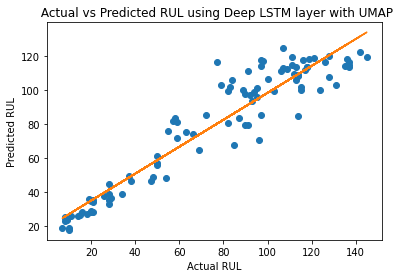

In [102]:
def create_model_dlstm_umap(): 
    model = Sequential()
    model.add(Masking(mask_value=-100, input_shape=(seq_length, feature_train_umap.shape[2])))
    model.add(LSTM(32, activation='tanh', input_shape=(seq_length,features),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, activation='tanh', input_shape=(seq_length,features),return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(8))
    model.add(Dense(8))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = create_model_dlstm_umap()
model.load_weights("umap/dimen4_neighbor100/weights-improvement-09-176.88.hdf5")
testPredict = model.predict(test_array_reducer)

x = np.array([y_test]).flatten()
y = np.array(testPredict).flatten()

m, b = np.polyfit(x, y, 1)
#m = slope, b = intercept
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
plt.xlabel('Actual RUL')
plt.ylabel("Predicted RUL")
plt.title(" Actual vs Predicted RUL using Deep LSTM layer with UMAP")
plt.show()

### Typical LSTM approach ( sequence to sequence)

In [39]:
## Training data

data_train_nw.head()

,engine_number,cycle,oper_set1,oper_set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,...,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21,RUL
0,1.0,0.00000,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,...,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.713178,0.724662,125.0
1,1.0,0.00277,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,...,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.666667,0.731014,125.0
2,1.0,0.00554,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,...,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.627907,0.621375,125.0
3,1.0,0.00831,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,...,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.573643,0.662386,125.0
4,1.0,0.01108,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,...,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.589147,0.704502,125.0


In [84]:
x_test=df_test.copy()
#x_test=df_test.drop(columns=['cycle','oper_set3','engine_number','sensor18','sensor19'])
x_test.head()

,engine_number,cycle,oper_set1,oper_set2,oper_set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [260]:
x_test.groupby('engine_number')['cycle'].max().count()

100

In [42]:
x_test_sc_nw = scaler.transform(x_test.drop(columns=['engine_number']+drop_nw))
x_test_sc_nw = np.append(np.array(x_test['engine_number']).reshape(x_test.shape[0],1),x_test_sc_nw,axis=1)
c = list(x_test_nw.columns)
x_test_df_sc_nw = pd.DataFrame(x_test_sc_nw, columns = c)
x_test_df_sc_nw.head()

,engine_number,cycle,oper_set1,oper_set2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor20,sensor21
0,1.0,0.00000,0.632184,0.750000,0.545181,0.310661,0.269413,1.0,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.558140,0.661834
1,1.0,0.00277,0.344828,0.250000,0.150602,0.379551,0.222316,1.0,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.682171,0.686827
2,1.0,0.00554,0.517241,0.583333,0.376506,0.346632,0.322248,1.0,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.728682,0.721348
3,1.0,0.00831,0.741379,0.500000,0.370482,0.285154,0.408001,1.0,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.666667,0.662110
4,1.0,0.01108,0.580460,0.500000,0.391566,0.352082,0.332039,1.0,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.658915,0.716377


In [47]:
max_cycle = data_train_nw.groupby('engine_number')['cycle'].count().max()
max_length = max_cycle
max_length

362

In [287]:
def seq_padded(data_train_sc,engine_num,max_length,columns):
    data_n = data_train_sc[data_train_sc['engine_number']==engine_num]
    data_n = data_n[columns]
    
    num_elem = data_n.shape[0]
    data_full = np.full((max_length-num_elem,data_n.shape[1]),fill_value=-100)
    data_eng = np.concatenate((data_n,data_full),axis=0)
    return data_eng

## Function for creating sequence of variable length without padding
def seq_ty_gen(data_train,max_length,columns,val):
    typical_train_seq = []
    engine = data_train['engine_number'].unique()
    n = val*len(engine)
    
    val_num = random.sample(list(engine),int(n)) ## engine units in validation set
    
    train_num = [i for i in engine if i not in val_num]  ## engine units in training set
    typical_train_seq=[(seq_padded(data_train,i,max_length,columns)) for i in train_num]
    val_set = [(seq_padded(data_train,i,max_length,columns)) for i in val_num]
    return np.array(typical_train_seq),np.array(val_set),train_num,val_num

# Function for Label

def label_typical(data_train_sc,max_length,train,val):
    engine_num = data_train_sc['engine_number'].unique()
    label_train=[]
    label_val =[]
    for i in train:
        data_n = data_train_sc[data_train_sc['engine_number']==i][['RUL']]
        
        num_elem = data_n.shape[0]
        data_full = np.full((max_length-num_elem,1),fill_value=-100)
        data_eng = np.concatenate((data_n,data_full),axis=0)
        label_train.append(data_eng)
    
    for i in val:
        data_n = data_train_sc[data_train_sc['engine_number']==i][['RUL']]
        
        num_elem = data_n.shape[0]
        data_full = np.full((max_length-num_elem,1),fill_value=-100)
        data_eng = np.concatenate((data_n,data_full),axis=0)
        label_val.append(data_eng)
    return np.array(label_train),np.array(label_val)

### Test Preparation

def test_seq_gen(data_scaled_test,max_length):
    test_unit = data_scaled_test['engine_number'].unique()
    data_arr_test = []
    for i in test_unit:  
        data_eng = data_scaled_test[data_scaled_test['engine_number']==i]
        data_eng = data_eng.drop(columns='engine_number').values
        num_elem = data_eng.shape[0]
        seq_arr_test = []
        if num_elem < max_length:
            data_n = np.full((max_length-num_elem,data_eng.shape[1]),fill_value=-100)
            data_eng = np.concatenate((data_n,data_eng),axis=0)
            data_arr_test.append(data_eng)
        else:
            data_n = data_eng[num_elem-max_length:num_elem]
            data_arr_test.append(data_n)
    return np.array(data_arr_test)


def shape_predicted_test(predicted_value):
    y_pred_act = []
    for i in range(0,100):
        y_pred_act.append(predicted_value[i][-1])
    return np.array(y_pred_act)

In [288]:
train_seq,val_seq,train,val = seq_ty_gen(data_train_nw,max_length,seq_cols,val=0.10)
label_train,label_val = label_typical(data_train_nw,max_length,train,val)
print("shape of x_train is {} and x_validation is {}".format(train_seq.shape,val_seq.shape))
print("shape of y_train is {} and y_validation is {}".format(label_train.shape,label_val.shape))

shape of x_train is (90, 362, 19) and x_validation is (10, 362, 19)
shape of y_train is (90, 362, 1) and y_validation is (10, 362, 1)


In [229]:
test_seq = test_seq_gen(x_test_df_sc_nw,max_length)

In [256]:
test_seq[0].shape

(362, 19)

In [241]:
filepath="typical_lstm_withpadding1/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 5,verbose=1)
callbacks_list = [checkpoint,early_stop]


model = Sequential()
# model.add(Masking(mask_value=-100., input_shape=(max_length,19)))
model.add(LSTM(32, activation='tanh', input_shape=(max_length,19),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(max_length,19),return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(
    train_seq,label_train,
    epochs=100,batch_size=32,
    validation_data = (val_seq,label_val),
    callbacks = callbacks_list)

Train on 90 samples, validate on 10 samples
Epoch 1/100
64/90 [====================>.........] - ETA: 3s - loss: 9570.4106 
Epoch 00001: val_loss improved from inf to 9718.62012, saving model to typical_lstm_withpadding1/weights-improvement-01-9718.62.hdf5
90/90 [==============================] - 11s 122ms/sample - loss: 9490.4941 - val_loss: 9718.6201
Epoch 2/100
64/90 [====================>.........] - ETA: 0s - loss: 9358.9375
Epoch 00002: val_loss improved from 9718.62012 to 9549.63965, saving model to typical_lstm_withpadding1/weights-improvement-02-9549.64.hdf5
90/90 [==============================] - 3s 39ms/sample - loss: 9334.1357 - val_loss: 9549.6396
Epoch 3/100
64/90 [====================>.........] - ETA: 0s - loss: 9222.4399
Epoch 00003: val_loss improved from 9549.63965 to 9337.37207, saving model to typical_lstm_withpadding1/weights-improvement-03-9337.37.hdf5
90/90 [==============================] - 4s 41ms/sample - loss: 9160.6458 - val_loss: 9337.3721
Epoch 4/100
64/

Epoch 27/100
64/90 [====================>.........] - ETA: 0s - loss: 2668.8142
Epoch 00027: val_loss improved from 2895.01123 to 2599.99927, saving model to typical_lstm_withpadding1/weights-improvement-27-2600.00.hdf5
90/90 [==============================] - 4s 42ms/sample - loss: 2671.8484 - val_loss: 2599.9993
Epoch 28/100
64/90 [====================>.........] - ETA: 0s - loss: 2472.9531
Epoch 00028: val_loss improved from 2599.99927 to 2343.75195, saving model to typical_lstm_withpadding1/weights-improvement-28-2343.75.hdf5
90/90 [==============================] - 4s 46ms/sample - loss: 2403.9370 - val_loss: 2343.7520
Epoch 29/100
64/90 [====================>.........] - ETA: 0s - loss: 2197.5201
Epoch 00029: val_loss improved from 2343.75195 to 2080.30005, saving model to typical_lstm_withpadding1/weights-improvement-29-2080.30.hdf5
90/90 [==============================] - 4s 42ms/sample - loss: 2151.1742 - val_loss: 2080.3000
Epoch 30/100
64/90 [====================>.........] 

Epoch 55/100
64/90 [====================>.........] - ETA: 0s - loss: 318.4222
Epoch 00055: val_loss improved from 280.22983 to 279.82278, saving model to typical_lstm_withpadding1/weights-improvement-55-279.82.hdf5
90/90 [==============================] - 3s 37ms/sample - loss: 316.3124 - val_loss: 279.8228
Epoch 56/100
64/90 [====================>.........] - ETA: 0s - loss: 306.2400
Epoch 00056: val_loss improved from 279.82278 to 252.88289, saving model to typical_lstm_withpadding1/weights-improvement-56-252.88.hdf5
90/90 [==============================] - 3s 36ms/sample - loss: 307.0011 - val_loss: 252.8829
Epoch 57/100
64/90 [====================>.........] - ETA: 0s - loss: 295.8267
Epoch 00057: val_loss did not improve from 252.88289
90/90 [==============================] - 4s 42ms/sample - loss: 307.7464 - val_loss: 257.7625
Epoch 58/100
64/90 [====================>.........] - ETA: 0s - loss: 303.9766
Epoch 00058: val_loss improved from 252.88289 to 248.59863, saving model to

Epoch 85/100
64/90 [====================>.........] - ETA: 0s - loss: 237.1623
Epoch 00085: val_loss did not improve from 165.11253
90/90 [==============================] - 4s 41ms/sample - loss: 260.0608 - val_loss: 166.5797
Epoch 86/100
64/90 [====================>.........] - ETA: 0s - loss: 214.3006
Epoch 00086: val_loss did not improve from 165.11253
90/90 [==============================] - 4s 42ms/sample - loss: 235.9050 - val_loss: 177.2810
Epoch 87/100
64/90 [====================>.........] - ETA: 0s - loss: 252.9207
Epoch 00087: val_loss did not improve from 165.11253
90/90 [==============================] - 4s 42ms/sample - loss: 258.9484 - val_loss: 174.2742
Epoch 88/100
64/90 [====================>.........] - ETA: 0s - loss: 243.0656
Epoch 00088: val_loss did not improve from 165.11253
90/90 [==============================] - 4s 41ms/sample - loss: 229.8380 - val_loss: 178.2448
Epoch 00088: early stopping


In [242]:
y_pred = model.predict(test_seq) ## adam optimizer
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)

test set RMSE:17.41726271254099, R2:0.8243289242003735


In [243]:
model.fit(
    train_seq,label_train,
    epochs=50,batch_size=32,
    validation_data = (val_seq,label_val),
    callbacks = callbacks_list)

Train on 90 samples, validate on 10 samples
Epoch 1/50
64/90 [====================>.........] - ETA: 0s - loss: 227.2517
Epoch 00001: val_loss did not improve from 165.11253
90/90 [==============================] - 4s 41ms/sample - loss: 230.0335 - val_loss: 166.1934
Epoch 2/50
64/90 [====================>.........] - ETA: 0s - loss: 218.4810
Epoch 00002: val_loss did not improve from 165.11253
90/90 [==============================] - 4s 45ms/sample - loss: 218.0760 - val_loss: 168.4910
Epoch 3/50
64/90 [====================>.........] - ETA: 0s - loss: 231.8641
Epoch 00003: val_loss improved from 165.11253 to 160.04871, saving model to typical_lstm_withpadding1/weights-improvement-03-160.05.hdf5
90/90 [==============================] - 4s 42ms/sample - loss: 226.1798 - val_loss: 160.0487
Epoch 4/50
64/90 [====================>.........] - ETA: 0s - loss: 208.9288
Epoch 00004: val_loss did not improve from 160.04871
90/90 [==============================] - 4s 41ms/sample - loss: 214.62

In [244]:
y_pred = model.predict(test_seq)
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)

test set RMSE:16.36966485982769, R2:0.8448256153081405


In [245]:
m = [str("typical_lstm_withpadding1\\")+ str(i) for i in listdir("typical_lstm_withpadding1")] 
for i in m:
    print(i)
    model = load_model(i)
    y_pred=model.predict(test_seq)
    testPredict = shape_predicted_test(y_pred)
    print(performance(y_test,testPredict))

typical_lstm_withpadding1\weights-improvement-03-160.05.hdf5
test set RMSE:18.431279539722553, R2:0.803278680989349
None
typical_lstm_withpadding1\weights-improvement-05-159.91.hdf5
test set RMSE:16.809527285380366, R2:0.8363743229031613
None
typical_lstm_withpadding1\weights-improvement-06-154.61.hdf5
test set RMSE:18.328991700369244, R2:0.8054561058042804
None
typical_lstm_withpadding1\weights-improvement-11-154.51.hdf5
test set RMSE:17.541780880545026, R2:0.8218081571063298
None
typical_lstm_withpadding1\weights-improvement-13-152.76.hdf5
test set RMSE:18.137226459121276, R2:0.8095056027221459
None
typical_lstm_withpadding1\weights-improvement-15-148.12.hdf5
test set RMSE:17.882109850571766, R2:0.8148268678145033
None
typical_lstm_withpadding1\weights-improvement-16-144.07.hdf5
test set RMSE:16.145917658825, R2:0.8490385973292036
None
typical_lstm_withpadding1\weights-improvement-18-142.86.hdf5
test set RMSE:15.803020475075032, R2:0.8553825626812581
None
typical_lstm_withpadding1\we

### Observation: 
The deep LSTM model resulted in RMSE value of 15.80 with epoch = 150.

### Implementation using UMAP

In [472]:
## umap transformed dataframe
## The values are changed for different parameters (n_neighbors and n_components). The results are obtanied below with multiple run and models are saved for different parameter values.
features = 6
x_train_reducer_df,reducer = umap_transform_train(x_train_df_sc,80,features)
x_test_reducer = umap_transform_test(reducer,x_test_df_sc)


In [473]:
seq_cols_nw = [i for i in range(x_train_reducer_df.shape[1]-1)]
seq_cols_nw

[0, 1, 2, 3, 4, 5]

In [474]:
train_seq_umap,val_seq_umap,train,val = seq_ty_gen(x_train_reducer_df,max_length,seq_cols_nw,val=0.10)
label_train_umap,label_val_umap = label_typical(data_train_nw,max_length,train,val)
print("shape of x_train is {} and x_validation is {}".format(train_seq_umap.shape,val_seq_umap.shape))
print("shape of y_train is {} and y_validation is {}".format(label_train.shape,label_val.shape))

shape of x_train is (90, 362, 6) and x_validation is (10, 362, 6)
shape of y_train is (90, 362, 1) and y_validation is (10, 362, 1)


In [475]:
x_test_seq = test_seq_gen(x_test_reducer,max_length)
x_test_seq.shape

(100, 362, 6)

In [476]:
filepath="typical_lstm_umap/dimen_6_neighbor80/weights-improvement-{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True, mode='min')

early_stop = EarlyStopping(monitor='val_loss',patience = 5,verbose=1)
callbacks_list = [checkpoint,early_stop]


model = Sequential()
# model.add(Masking(mask_value=-100., input_shape=(max_length,19)))
model.add(LSTM(32, activation='tanh', input_shape=(max_length,train_seq_umap.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh', input_shape=(max_length,train_seq_umap.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(
    train_seq_umap,label_train_umap,
    epochs=100,batch_size=32,
    validation_data = (val_seq_umap,label_val_umap),
    callbacks = callbacks_list)

Train on 90 samples, validate on 10 samples
Epoch 1/100
64/90 [====================>.........] - ETA: 10s - loss: 9600.2710
Epoch 00001: val_loss improved from inf to 9429.85547, saving model to typical_lstm_umap/dimen_6_neighbor80/weights-improvement-01-9429.86.hdf5
90/90 [==============================] - 30s 329ms/sample - loss: 9547.3354 - val_loss: 9429.8555
Epoch 2/100
64/90 [====================>.........] - ETA: 1s - loss: 9339.7104
Epoch 00002: val_loss improved from 9429.85547 to 9235.22559, saving model to typical_lstm_umap/dimen_6_neighbor80/weights-improvement-02-9235.23.hdf5
90/90 [==============================] - 5s 58ms/sample - loss: 9361.6179 - val_loss: 9235.2256
Epoch 3/100
64/90 [====================>.........] - ETA: 1s - loss: 9121.0918
Epoch 00003: val_loss improved from 9235.22559 to 9016.47754, saving model to typical_lstm_umap/dimen_6_neighbor80/weights-improvement-03-9016.48.hdf5
90/90 [==============================] - 5s 56ms/sample - loss: 9162.5231 - va

Epoch 26/100
64/90 [====================>.........] - ETA: 1s - loss: 2455.7096
Epoch 00026: val_loss improved from 2507.43018 to 2238.55420, saving model to typical_lstm_umap/dimen_6_neighbor80/weights-improvement-26-2238.55.hdf5
90/90 [==============================] - 5s 57ms/sample - loss: 2434.0035 - val_loss: 2238.5542
Epoch 27/100
64/90 [====================>.........] - ETA: 1s - loss: 2210.0961
Epoch 00027: val_loss improved from 2238.55420 to 1956.37683, saving model to typical_lstm_umap/dimen_6_neighbor80/weights-improvement-27-1956.38.hdf5
90/90 [==============================] - 5s 56ms/sample - loss: 2171.9671 - val_loss: 1956.3768
Epoch 28/100
64/90 [====================>.........] - ETA: 1s - loss: 1923.9332
Epoch 00028: val_loss improved from 1956.37683 to 1739.84033, saving model to typical_lstm_umap/dimen_6_neighbor80/weights-improvement-28-1739.84.hdf5
90/90 [==============================] - 5s 60ms/sample - loss: 1918.0369 - val_loss: 1739.8403
Epoch 29/100
64/90 

Epoch 54/100
64/90 [====================>.........] - ETA: 1s - loss: 1049.1569
Epoch 00054: val_loss did not improve from 192.12675
90/90 [==============================] - 5s 59ms/sample - loss: 1087.5721 - val_loss: 1189.5592
Epoch 55/100
64/90 [====================>.........] - ETA: 1s - loss: 1186.0156
Epoch 00055: val_loss did not improve from 192.12675
90/90 [==============================] - 5s 58ms/sample - loss: 1183.3952 - val_loss: 1104.4398
Epoch 00055: early stopping


In [480]:
model = load_model("typical_lstm_umap/dimen_6_neighbor80/weights-improvement-50-192.13.hdf5")  
y_pred = model.predict(x_test_seq)  ## dimen = 6 , neighbor =80
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
# model.save('typical_lstm_umap/dimen_6_neighbor80/dimen_6_neighbor80.hdf5')

test set RMSE:17.853483592518863, R2:0.8154192555197333


In [465]:
model = load_model("typical_lstm_umap/dimen_6_neighbor20/dimen_6_neighbor20.hdf5")  
y_pred = model.predict(x_test_seq)  ## dimen = 6 , neighbor =20
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
# model.save('typical_lstm_umap/dimen_6_neighbor20/dimen_6_neighbor20.hdf5')

test set RMSE:19.960112605230066, R2:0.7692899943264597


In [453]:
model=load_model("typical_lstm_umap/dimen_6_neighbor50/weights-improvement-68-139.39.hdf5")
y_pred = model.predict(x_test_seq)  ## dimen = 6 , neighbor =50
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_6_neighbor50/dimen_6_neighbor50.hdf5')

test set RMSE:18.86430964160192, R2:0.7939264329777794


In [446]:
# model=load_model("typical_lstm_umap/dimen_6_neighbor35/weights-improvement-68-167.24.hdf5")
y_pred = model.predict(x_test_seq)  ## dimen = 6 , neighbor =35
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_6_neighbor35/dimen_6_neighbor35.hdf5')

test set RMSE:17.610185035680136, R2:0.820415729716423


In [437]:
# model=load_model("typical_lstm_umap/dimen_5_neighbor20/weights-improvement-59-229.30.hdf5")
y_pred = model.predict(x_test_seq)  ## dimen = 5 , neighbor =20
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_5_neighbor20/dimen_5_neighbor20.hdf5')

test set RMSE:19.831559977406727, R2:0.7722521890839468


In [424]:
# model=load_model("typical_lstm_umap/dimen_4_neighbor80/weights-improvement-60-146.25.hdf5")
y_pred = model.predict(x_test_seq)  ## dimen = 4 , neighbor =80
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_4_neighbor80/dimen_4_neighbor80.hdf5')

test set RMSE:16.47024737179039, R2:0.8429128357532217


In [395]:
model = load_model("typical_lstm_umap/dimen_5_neighbor80/weights-improvement-04-150.00.hdf5")
y_pred = model.predict(x_test_seq) ## dimen = 5, neighbor = 80
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)


test set RMSE:19.17098231291958, R2:0.7871717917541223


In [470]:
model = load_model("typical_lstm_umap/dimen_6_neighbor20/dimen_6_neighbor20.hdf5") ## dimen = 6, dimen=20
y_pred = model.predict(x_test_seq) 
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
# model.save('typical_lstm_umap/dimen_6_neighbor20/dimen_6_neighbor20.hdf5')

test set RMSE:19.29904585247963, R2:0.7843188791926667


In [405]:
y_pred = model.predict(x_test_seq) ## dimen = 5, neighbor = 100
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_5_neighbor100/dimen_5_neighbor100.hdf5')

test set RMSE:15.949352339895077, R2:0.8526919229673644


In [382]:
y_pred = model.predict(x_test_seq) ## dimen = 5, neighbor = 50
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_5_neighbor50/dimen_5_neighbor50.hdf5')

test set RMSE:18.166681492850692, R2:0.8088863707701589


In [428]:
model = load_model("typical_lstm_umap/dimen_4_neighbor100/weights-improvement-12-126.08.hdf5")
y_pred = model.predict(x_test_seq) ## dimen = 4, neighbor = 100
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)

test set RMSE:18.178027103803778, R2:0.8086475843997574


In [366]:
y_pred = model.predict(x_test_seq) ## dimen = 5, neighbors = 35
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_5_neighbor35/15.02rmse.hdf5')

test set RMSE:15.023604262884055, R2:0.8692960458347591


In [341]:
y_pred = model.predict(x_test_seq) ## dimen = 4, neighbors = 50
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)
model.save('typical_lstm_umap/dimen_4_neighbor50/dimen_4_neighbor50_15.48.hdf5')

test set RMSE:15.48686883692447, R2:0.861111049512886


In [356]:
model = load_model("typical_lstm_umap\dimen_4_neighbor35\weights-improvement-03-192.37.hdf5") ## n_dimen = 4 , n_neighbors = 35
y_pred = model.predict(x_test_seq) ## adam optimizer
y_predicted = shape_predicted_test(y_pred)
performance(y_test,y_predicted)

test set RMSE:17.299893381151808, R2:0.8266885287695027


**Deep LSTM** :<br>
    
1) Dimension = 4 <br>
Neighbor = 35 ---> RMSE : 17.29 <br>
**Neighbor = 50 ---> RMSE : 15.28** <br>
Neighbor = 80 ---> RMSE : 16.47 <br>
Neighbor = 100 ---> RMSE : 18.17 <br>


2) Dimension = 5 <br>
Neighbor = 20 ---> RMSE : 19.83 <br>
**Neighbor = 35 ---> RMSE : 15.02** <br>
Neighbor = 50 ---> RMSE : 18.16 <br>
Neighbor = 80 ---> RMSE : 19.17 <br>
Neighbor = 100 ---> RMSE : 15.94 <br>

3) Dimension = 6 <br>
Neighbor = 20 ---> RMSE : 19.29 <br>
**Neighbor = 35 ---> RMSE : 17.61** <br>
Neighbor = 50 ---> RMSE : 18.86 <br>
Neighbor = 80 ---> RMSE : 17.85 <br>

**Observation** : We can observe that by using UMAP dimension reduction, the RMSE has improved from **15.80** to **15.02**.

### References

1. https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html